# Import packages

In [28]:
%load_ext autoreload
%autoreload 2

import file_handler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper
import re

import matplotlib.cm as cmtest_roads
import matplotlib as mpl

import osmnx as ox
import importlib


from sklearn.linear_model import LinearRegression


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## basic Loading and table drawing functions

In [412]:
def getRoadChart_by_time(start_year,end_year,road_name,city):
    roads = []
    for year in range(start_year, end_year+1):
        for month in range(1, 13):
            item = ''
            try:
                item = file_handler.getRoadAddress(
                    str(year), str(month), city, road_name)
                if item != None:
                    roads.append(item)
            except Exception as e:
                print(f"Error: {e}")
                break

    df = file_handler.load_csv_file(roads[0])
    for i in range(len(roads)):
        df = df._append(file_handler.load_csv_file(roads[i]))
    df = df.reset_index()
    return df


def getRoadChart(road):
    city = 'تهران'

    roads = []

    for year in range(1395, 1403):
        for month in range(1, 13):
            item = ''
            try:
                item = file_handler.getRoadAddress(
                    str(year), str(month), city, road)
                if item != None:
                    roads.append(item)
            except:
                break

    df = file_handler.load_csv_file(roads[0])
    for i in range(len(roads)):
        df = df._append(file_handler.load_csv_file(roads[i]))
    df = df.reset_index()
    return df

def Draw_road_time_series(df2):
    plt.figure()  # Create a new figure for each plot
    df2['زمان شروع'] = df2['زمان شروع'].apply(lambda x: x.split()[0]) # drop the 00:00:00 part
    plt.plot(df2['زمان شروع'], df2['تعداد کل وسیله نقلیه'])
    x=df2['زمان شروع']
    # Customize x-axis ticks and labels
    # Rotate x-axis labels for better readability
    plt.xticks(x[::365],  rotation=45)
    # Add more customization as needed
    plt.title(file_handler.persian_fix(df2['نام محور'][0]))
    # Add title, labels, legend, etc.
    plt.xlabel(file_handler.persian_fix('تاریخ'))
    plt.ylabel(file_handler.persian_fix('تعداد خودرو '))
    plt.legend(['Legend'])

def Draw_road_time_series_smooth(df2, window=7):
    plt.figure()  # Create a new figure for each plot
    df2['زمان شروع'] = df2['زمان شروع'].apply(lambda x: x.split()[0]) # drop the 00:00:00 part
    ave = df2['تعداد کل وسیله نقلیه'].rolling(window=window).mean()
    plt.plot(df2['زمان شروع'], ave)
    x=df2['زمان شروع']
    # Customize x-axis ticks and labels
    # Rotate x-axis labels for better readability
    plt.xticks(x[::365],  rotation=45)
    # Add more customization as needed
    plt.title(file_handler.persian_fix(df2['نام محور'][0]+ " Smooth") )
    # Add title, labels, legend, etc.
    plt.xlabel(file_handler.persian_fix('تاریخ'))
    plt.ylabel(file_handler.persian_fix('تعداد خودرو '))
    plt.legend(['Legend'])

## test the function on some data:

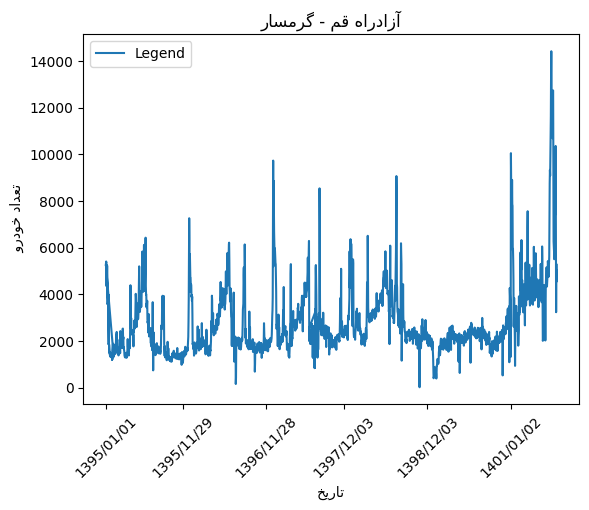

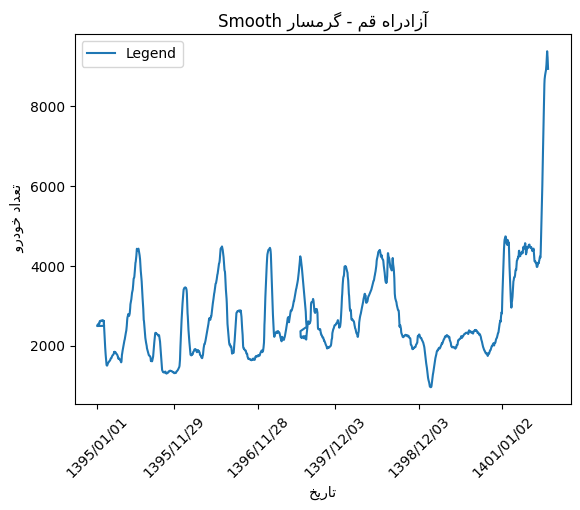

In [423]:

df2 = getRoadChart('113201')
df3 = getRoadChart('113201')
Draw_road_time_series(df2)
Draw_road_time_series_smooth(df3, window=30)



# Load the road_code of each city :
load the road_code and road_name of each city and copple them

In [438]:
def Load_road_code_of_city(city):
    codes = list(map ( lambda x: re.search('([0-9]{6,6})', x).group(),file_handler.get_dayly_data_path_with_year_month_city('1395','2',str(city))))
    return codes

def Load_road_name_of_city(city):
    t = file_handler.get_dayly_data_path_with_year_month_city('1395','2',str(city))
    names = {}
    for i in range(len(t)):
        names[codes[i]] = ' '.join(t[i].split('/')[-1].split(' ')[2:-1])
    return names

def Load_roads_code_of_contry():
    codes = []
    for item in file_handler.Citys:
        codes.extend(Load_road_code_of_city(item))
    return codes

def Load_roads_name_of_contry():
    t = []
    for item in file_handler.Citys:
        t.extend(file_handler.get_dayly_data_path_with_year_month_city('1395','2',str(item)))

    names = {}
    for i in range(len(t)):
        names[codes[i]] = ' '.join(t[i].split('/')[-1].split(' ')[2:-1])
    return names

codes = Load_road_code_of_city('تهران')
names =Load_road_name_of_city('تهران')
names
# codes = Load_roads_code_of_contry()
# names = Load_roads_name_of_contry()
# len(all_roads_name)

{'113201': '\u202bآزادراه قم - گرمسار\u202c',
 '113203': '\u202bتهران - قم (آزادراه)\u202c',
 '113204': '\u202bتهران - ساوه (ابتداي آزادراه)\u202c',
 '113205': '\u202bتهران - جاجرود\u202c',
 '113206': '\u202bتهران - پرديس (ابتداي آزادراه)\u202c',
 '113207': '\u202bتهران - \u200dپرديس (انتهاي آزادراه)\u202c',
 '113209': '\u202bتهران - پاکدشت\u202c',
 '113210': '\u202bعوارضي تهران - قم\u202c',
 '113211': '\u202bچرمشهر - حسن\u200cآباد \u202c',
 '113212': '\u202bامام زاده داوود - تهران\u202c',
 '113213': '\u202bتهران - لواسان (طلاييه)\u202c',
 '113214': '\u202bتهران - لواسان (سوهانک)\u202c',
 '113228': '\u202bآزادراه تهران - ساوه(پرند)\u202c',
 '113251': '\u202bآزادراه گرمسار - قم\u202c',
 '113253': '\u202bقم - تهران (آزادراه)\u202c',
 '113254': '\u202bساوه - تهران (ابتداي آزادراه)\u202c',
 '113255': '\u202bجاجرود - تهران\u202c',
 '113256': '\u202bپرديس - تهران (ابتداي آزادراه)\u202c',
 '113257': '\u202bپرديس - تهران (انتهاي آزادراه)\u202c',
 '113259': '\u202bپاکدشت - تهران\u202c',
 '11326

## Make dictionary roads_codes & roads_names :

In [416]:
def Make_dict(roads_codes):
    roads = dict()
    for code in roads_codes:
        roads[code] = getRoadChart(str(code))
    return roads

test_roads = Make_dict(codes)


/tmp/ipykernel_5307/4052487330.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(file_handler.load_csv_file(roads[i]))


/tmp/ipykernel_5307/4052487330.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()  # Create a new figure for each plot


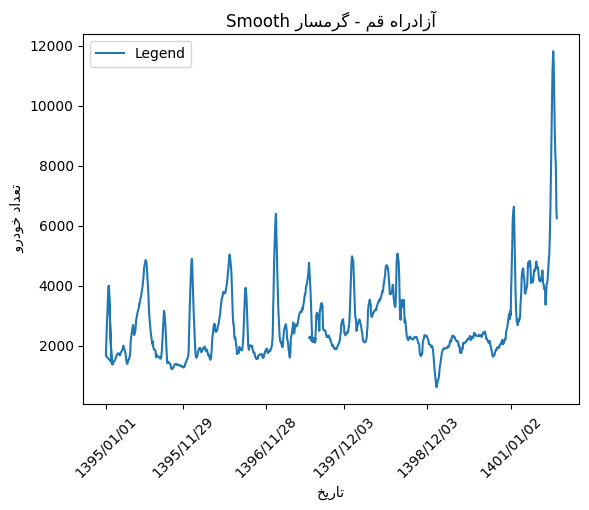

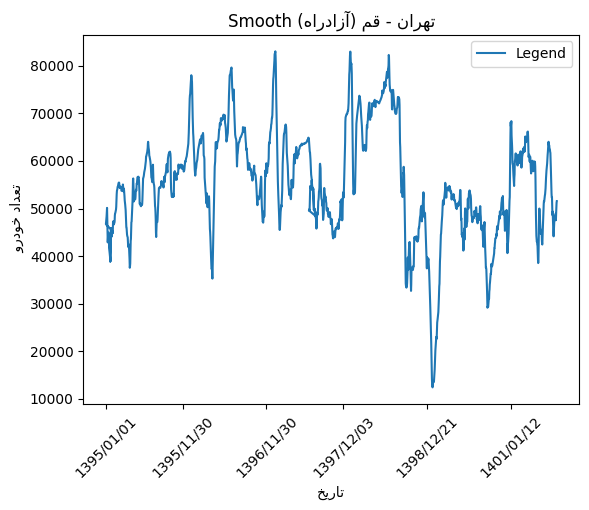

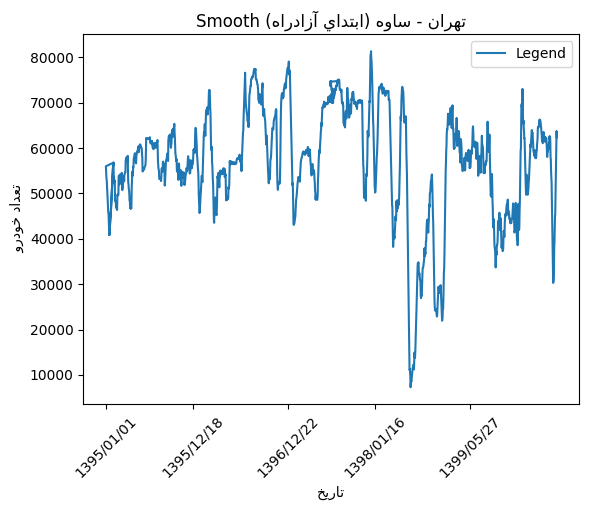

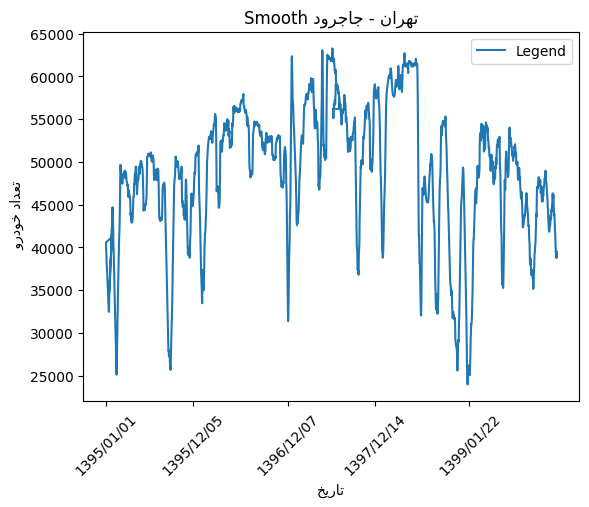

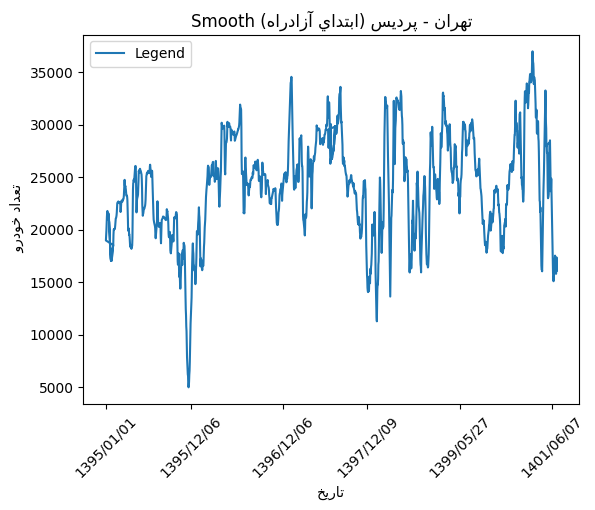

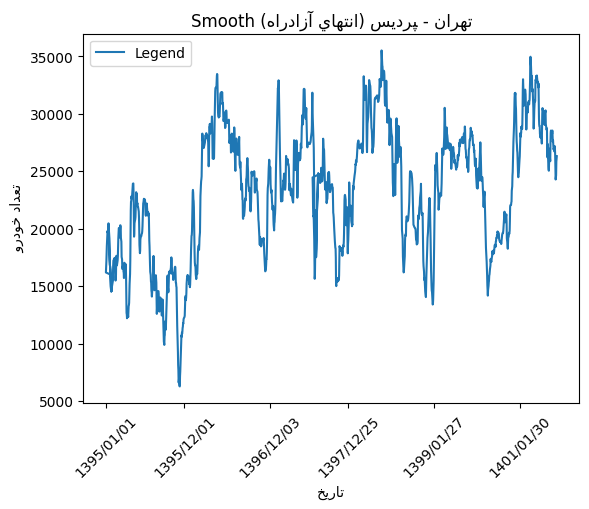

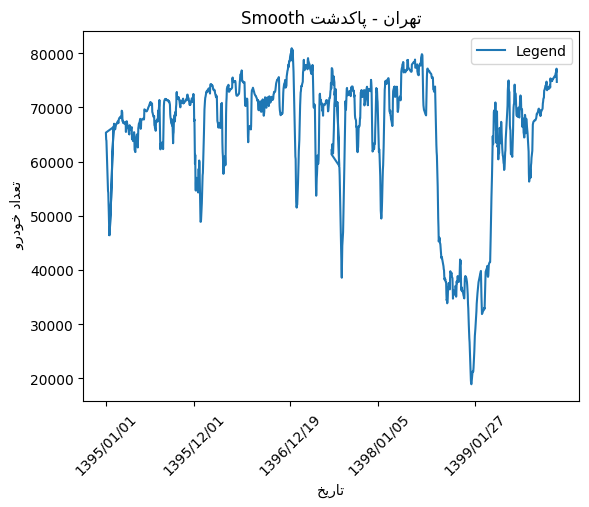

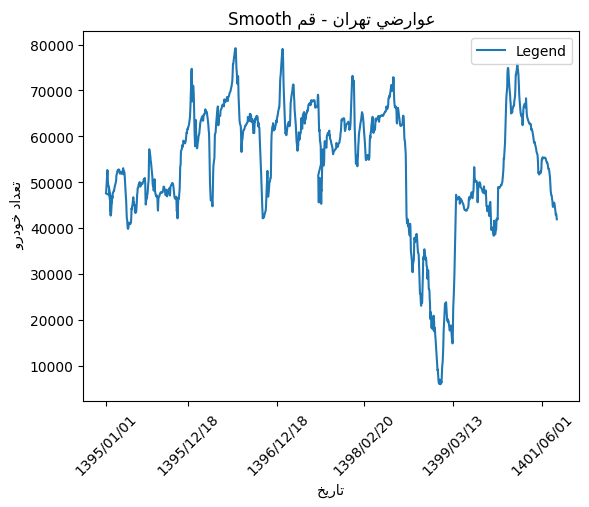

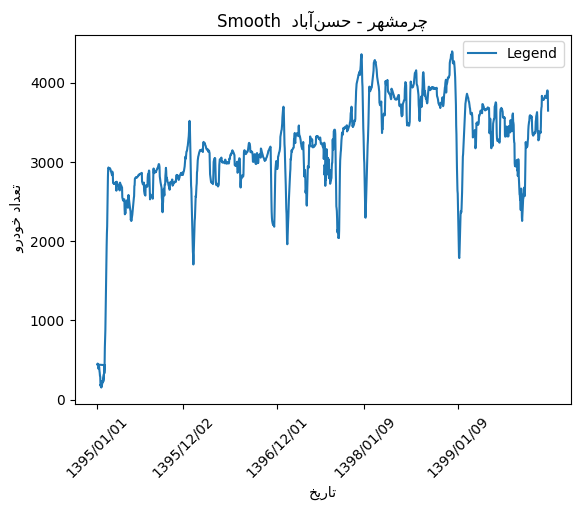

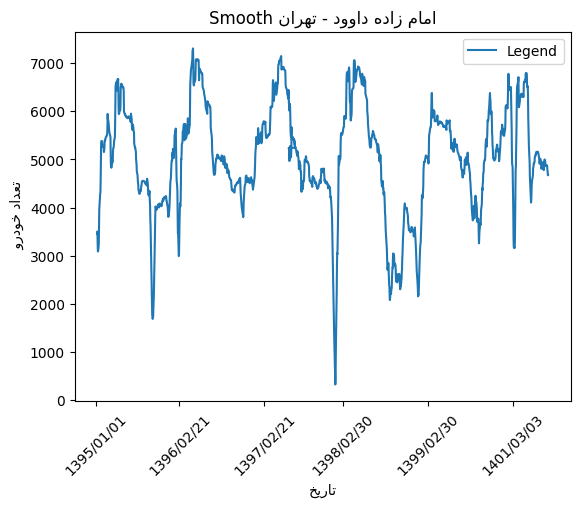

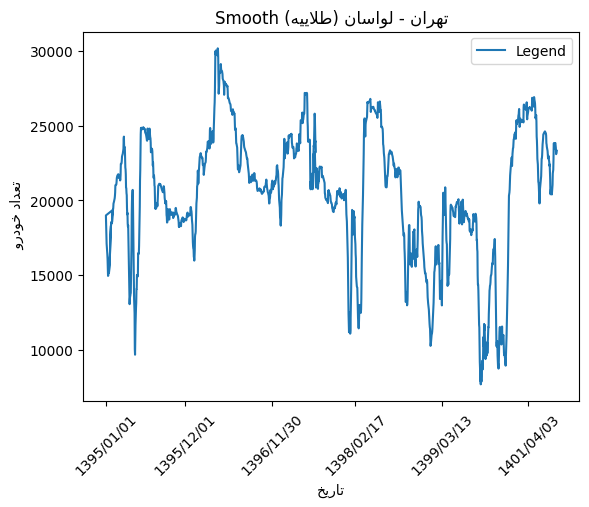

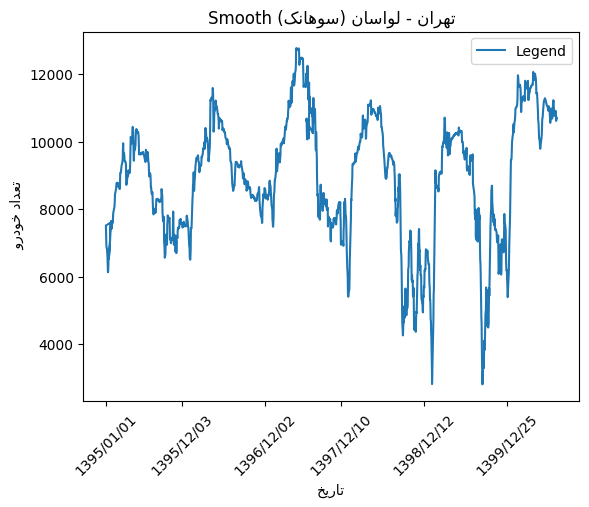

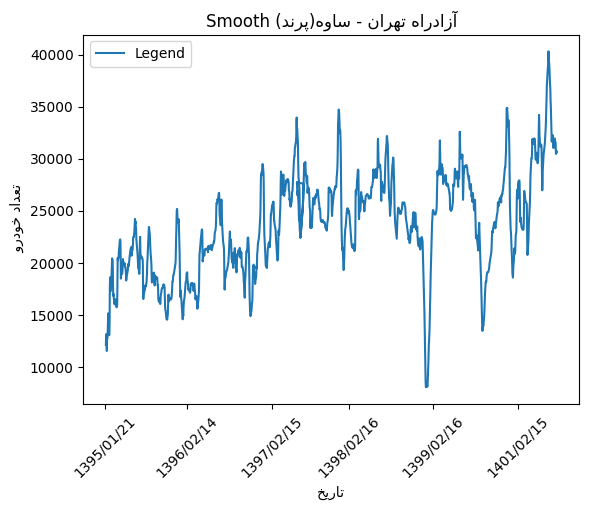

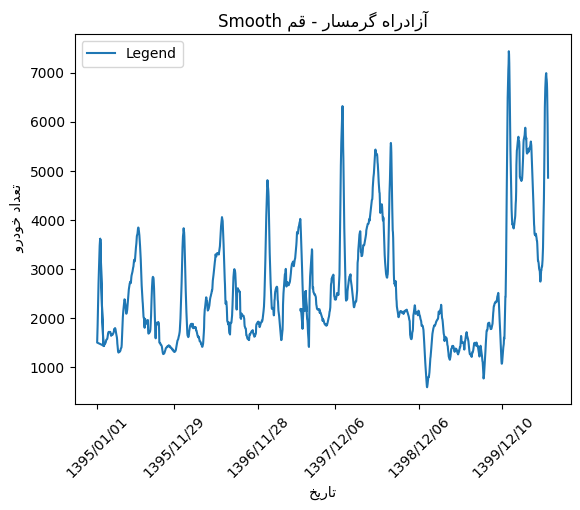

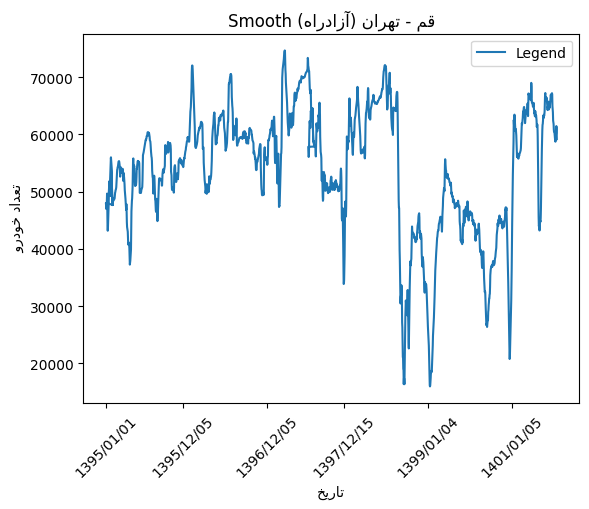

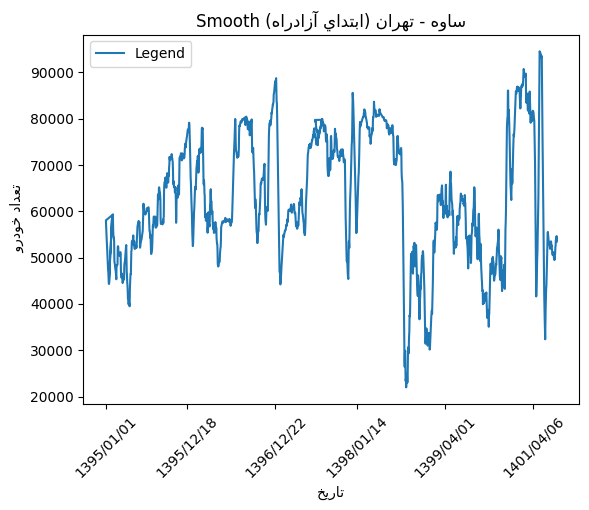

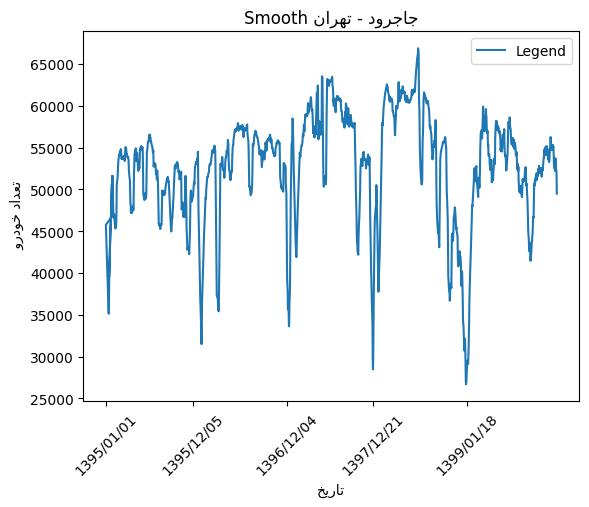

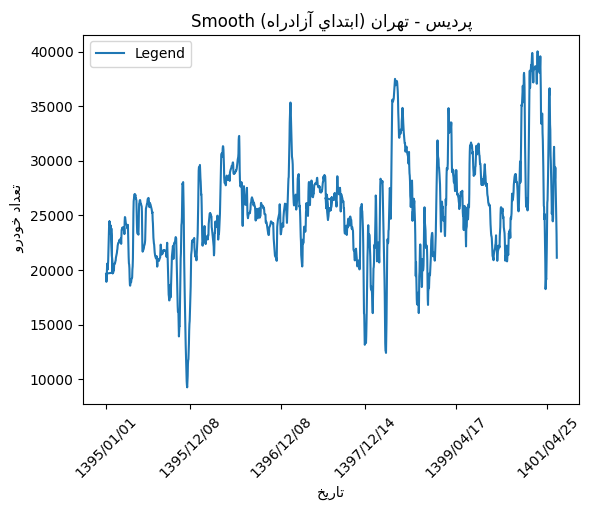

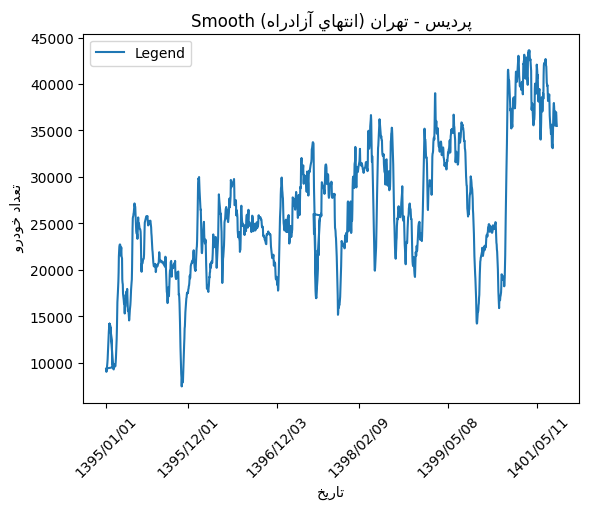

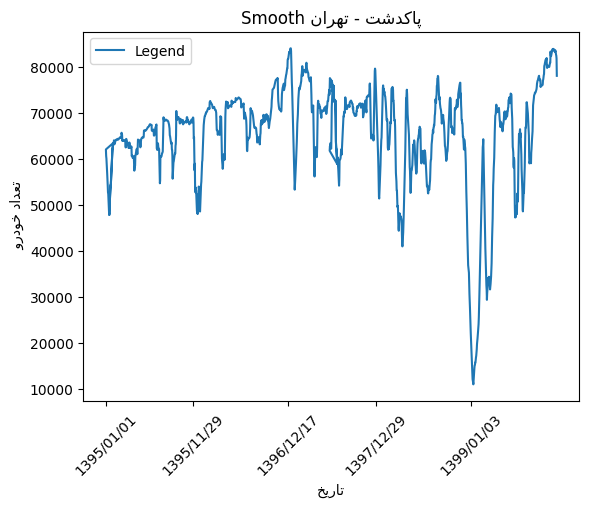

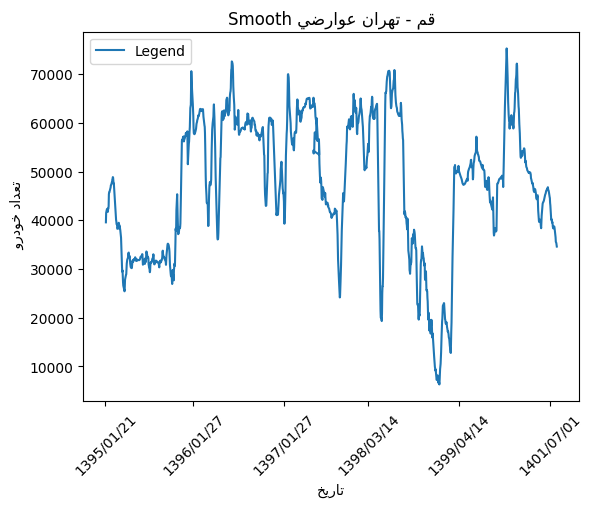

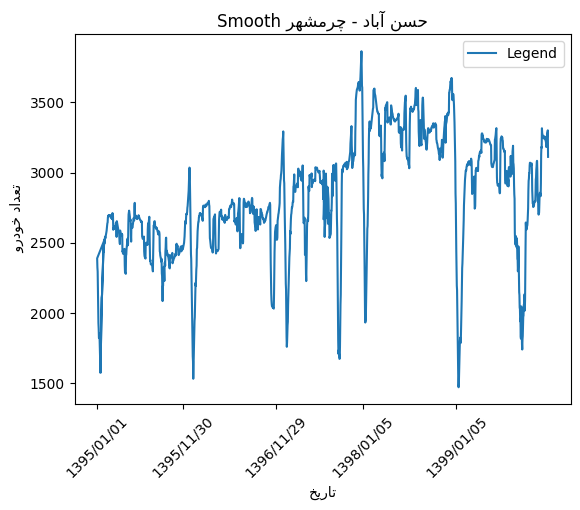

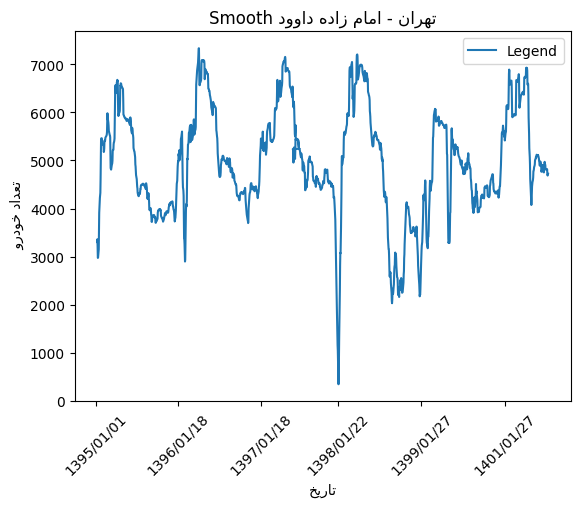

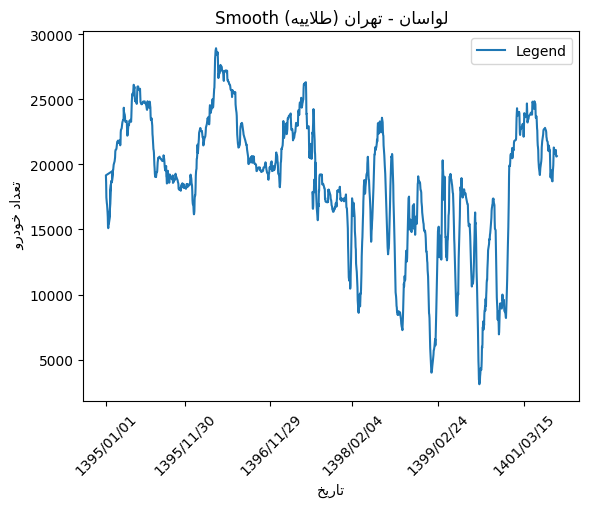

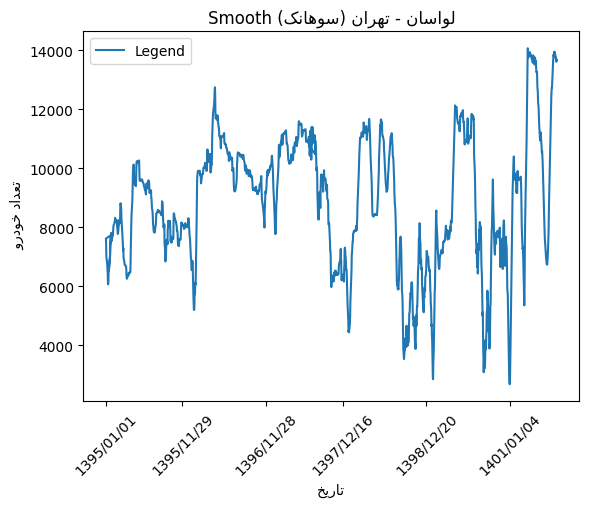

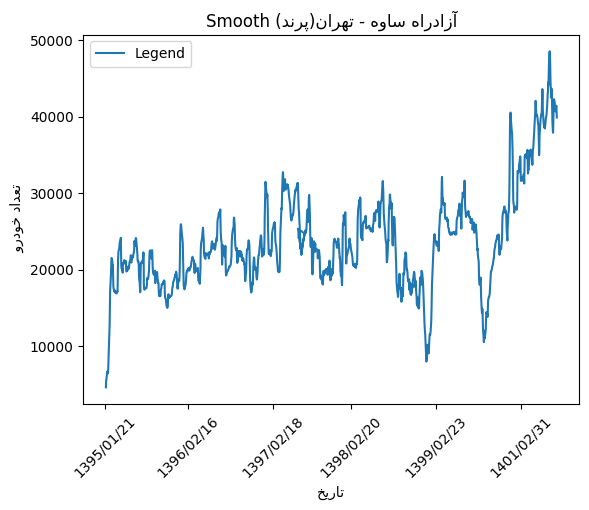

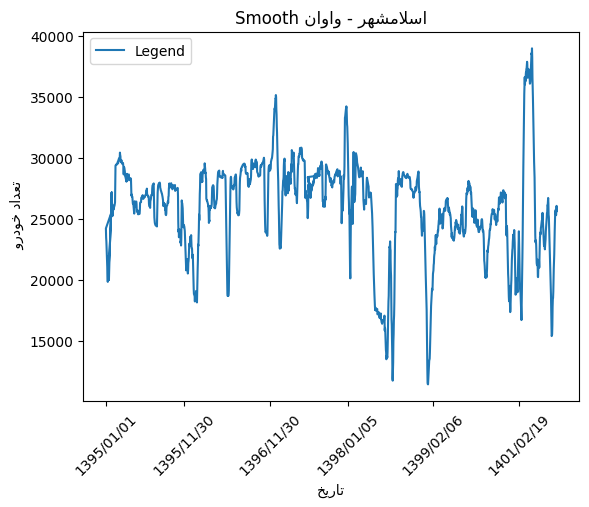

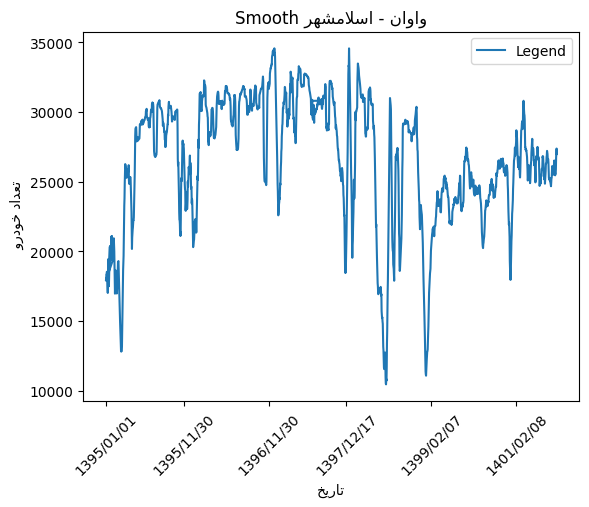

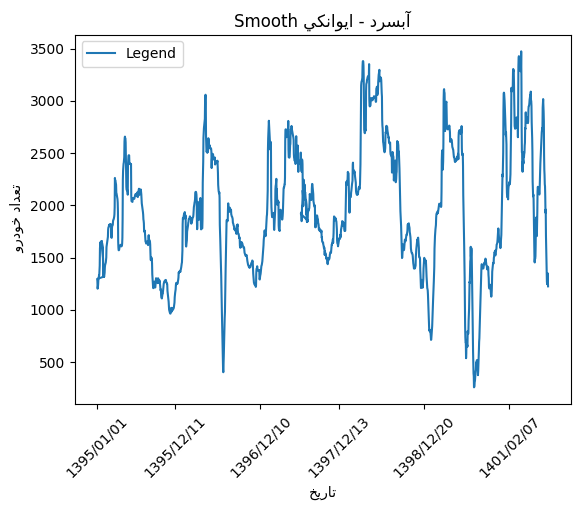

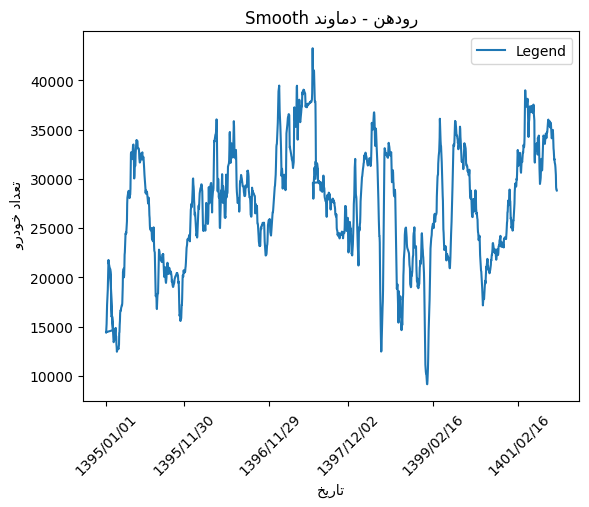

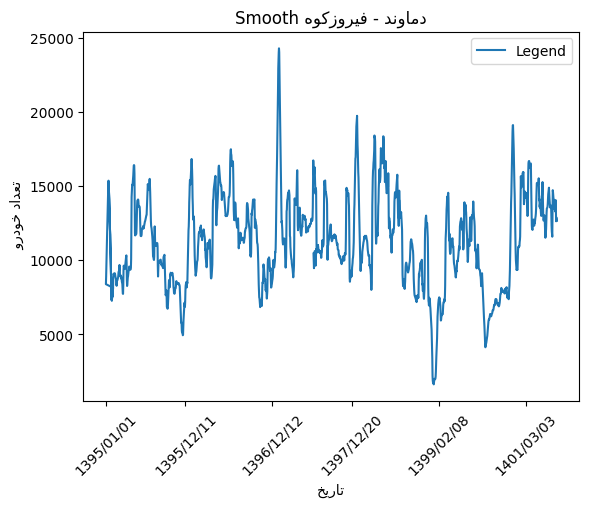

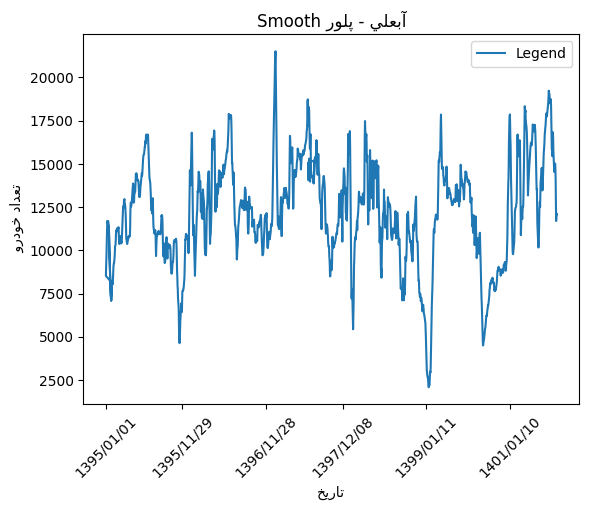

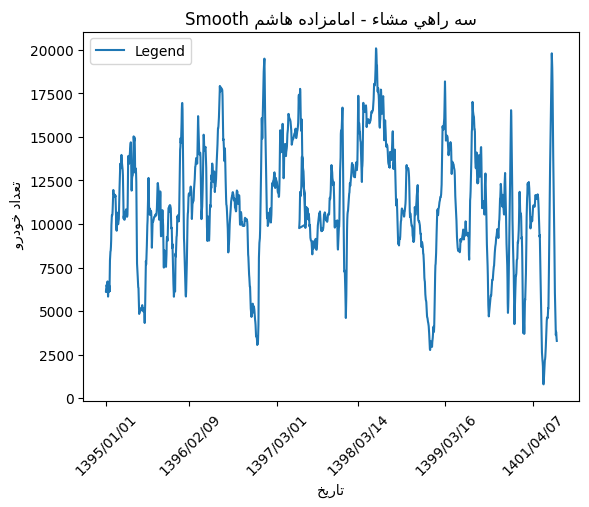

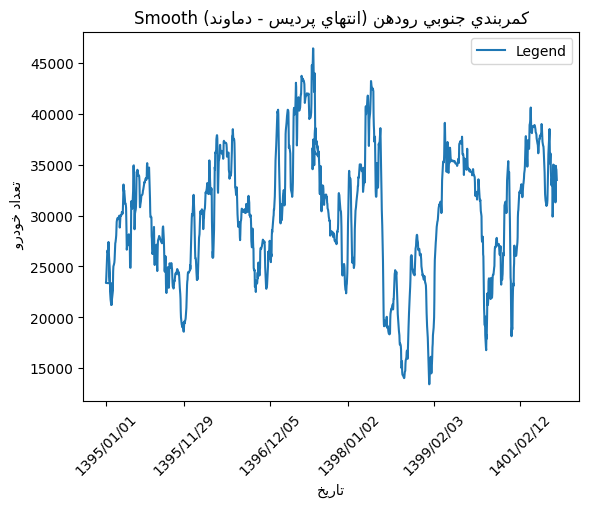

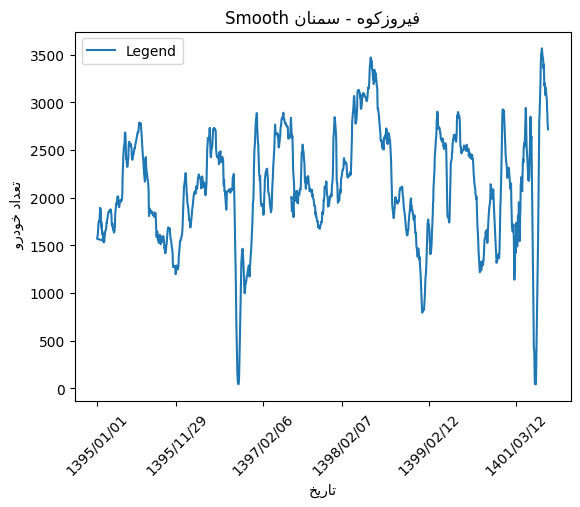

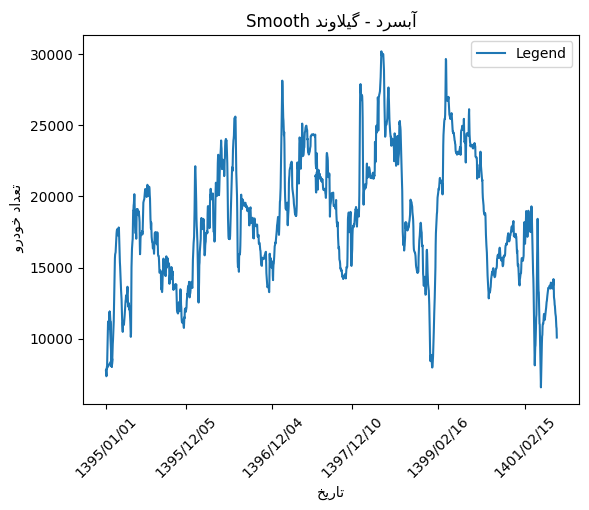

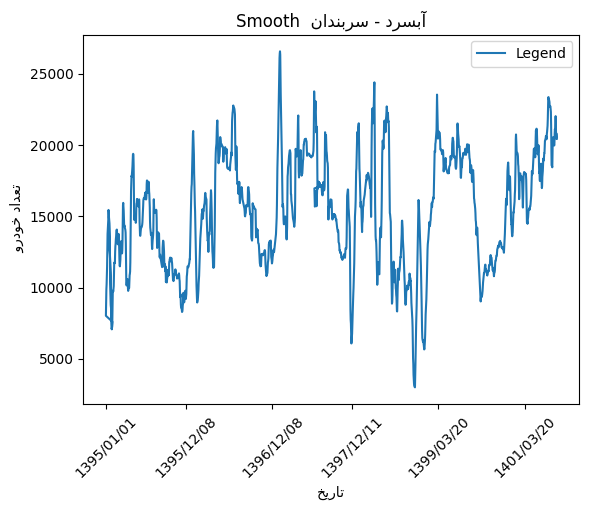

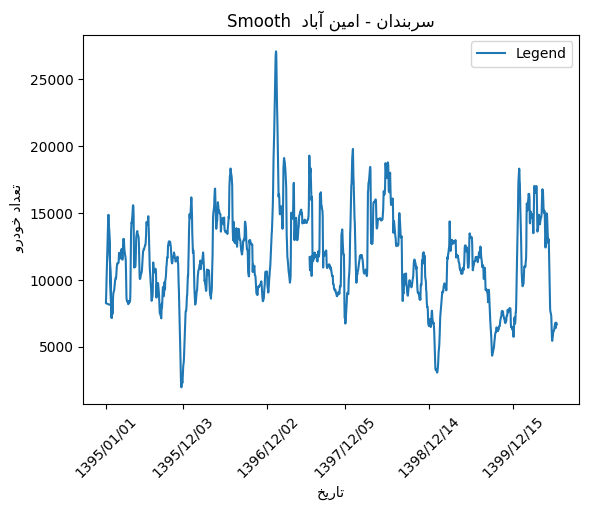

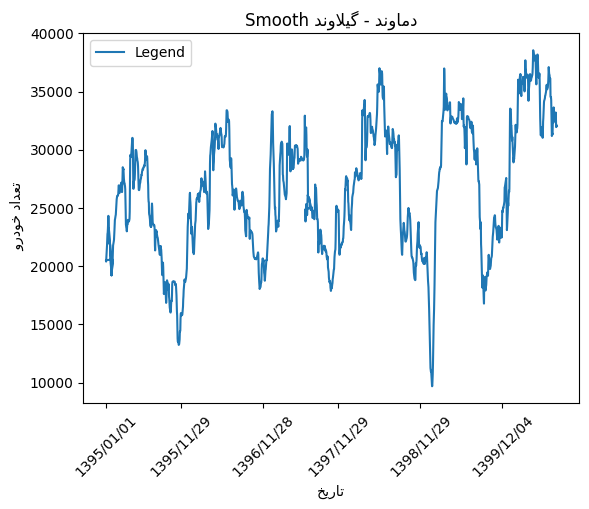

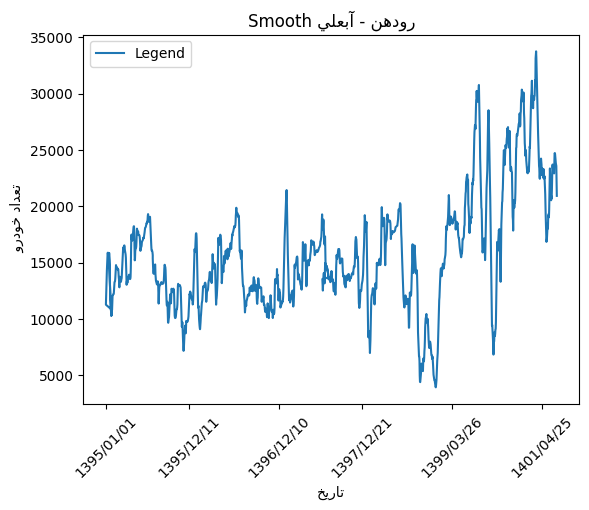

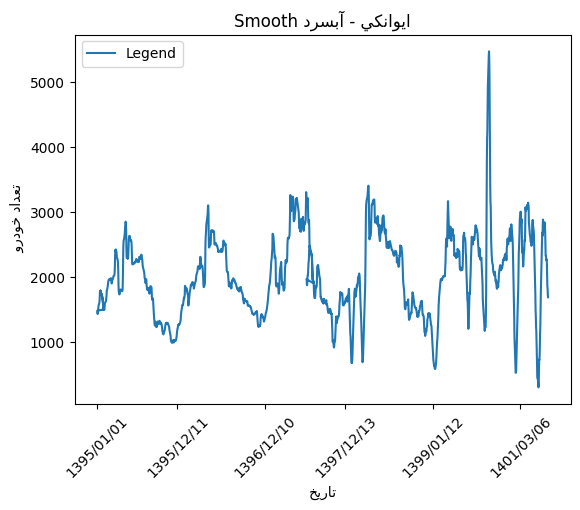

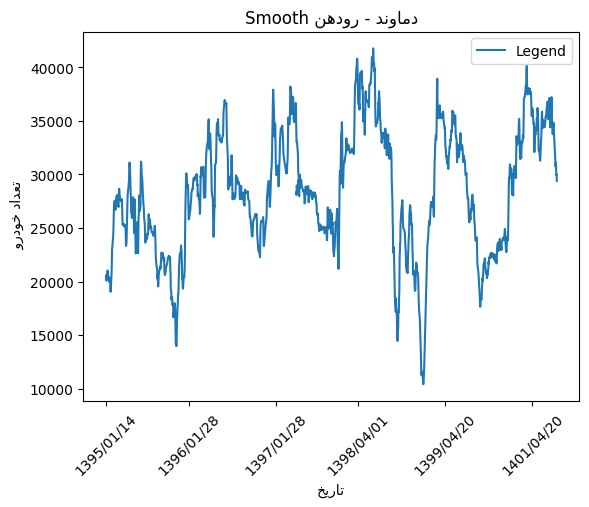

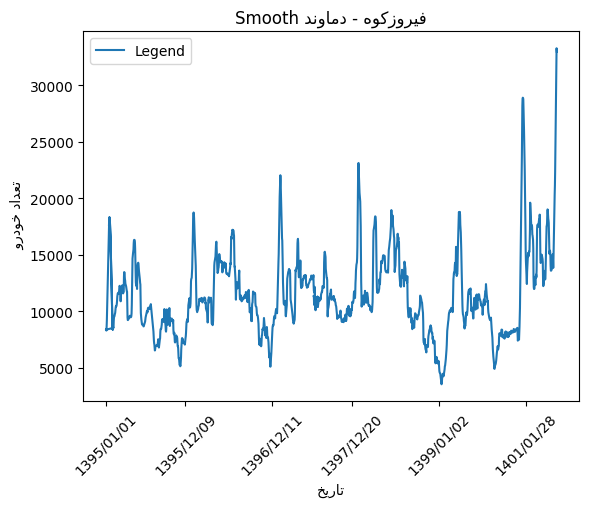

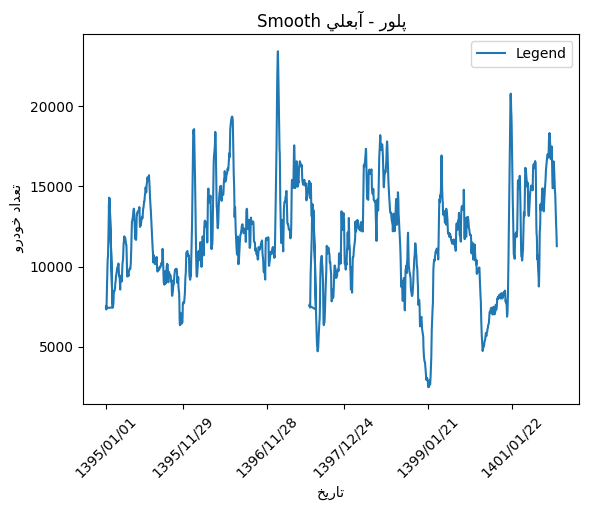

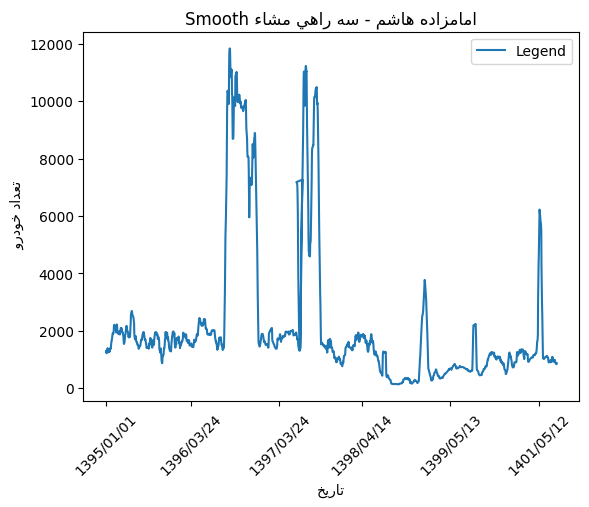

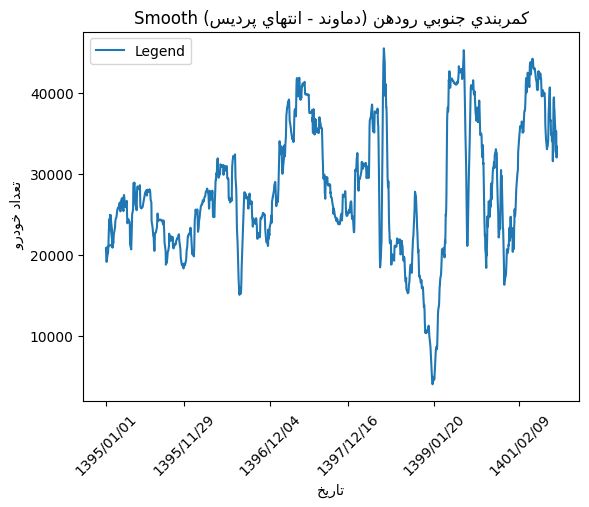

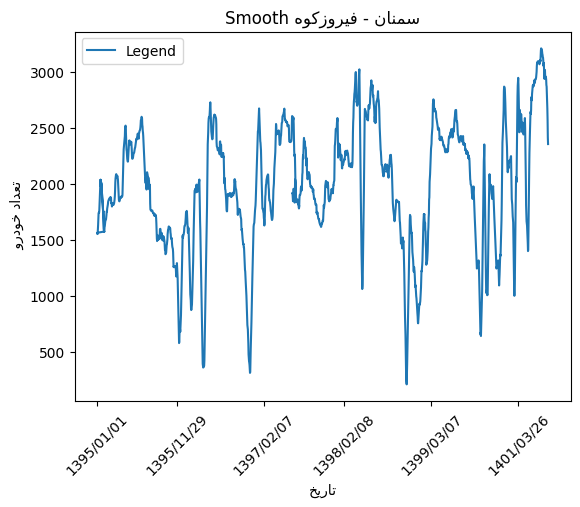

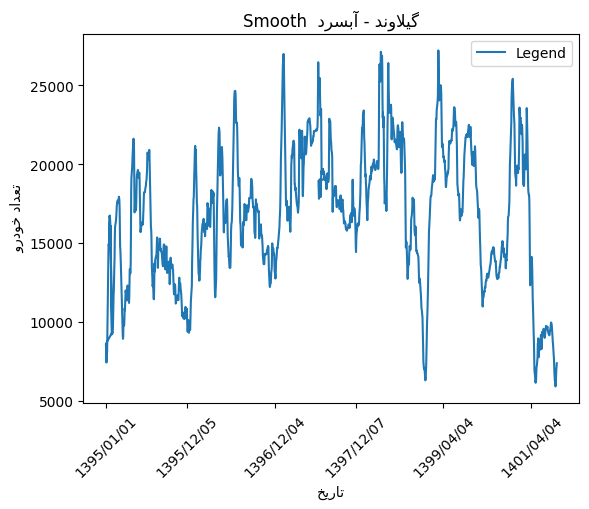

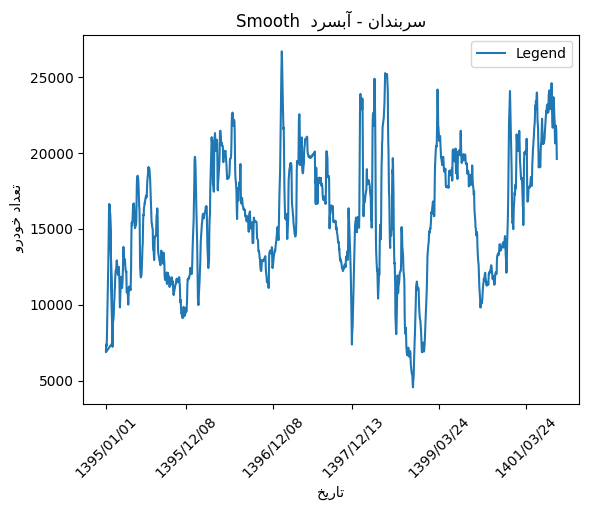

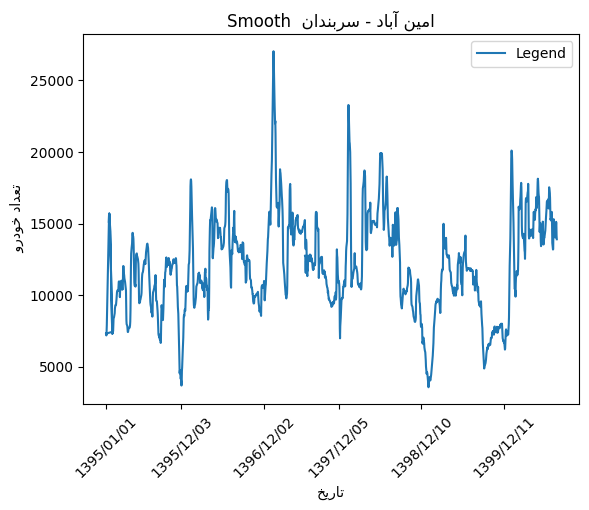

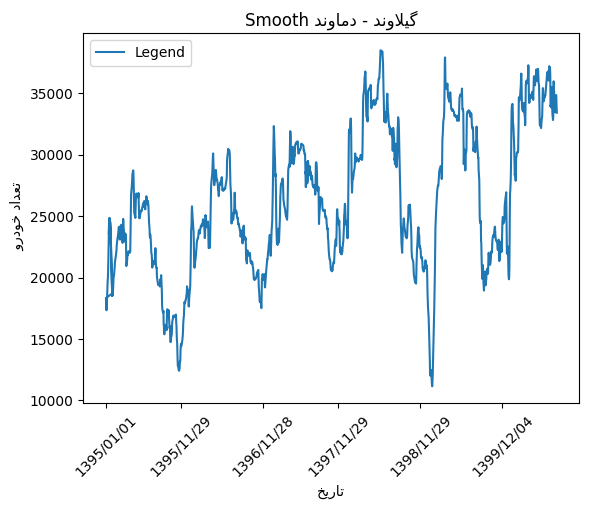

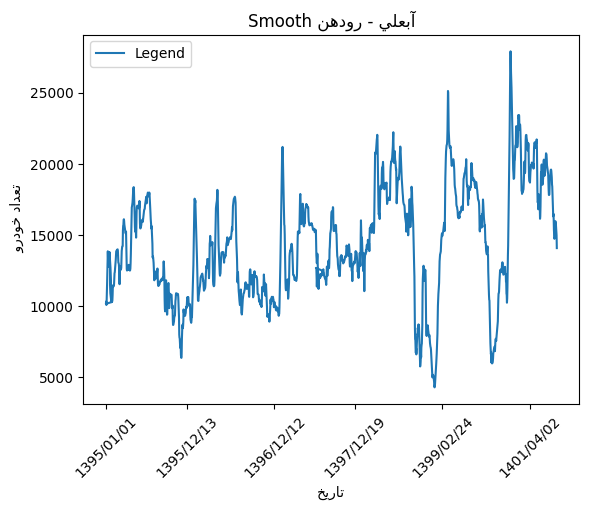

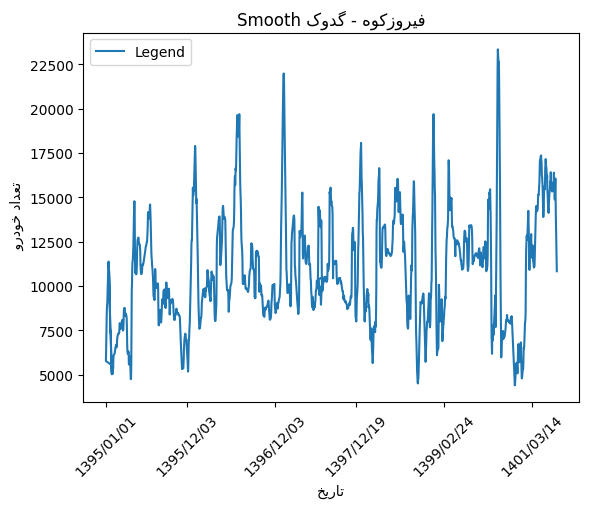

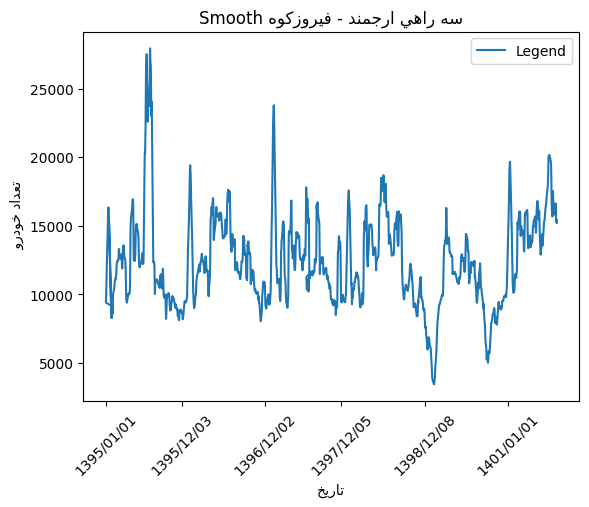

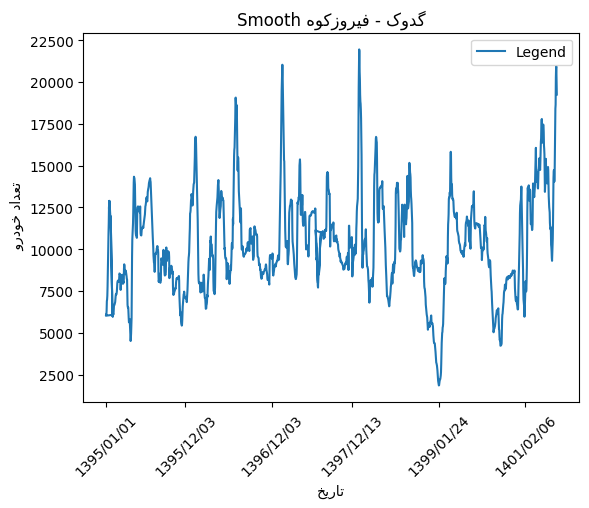

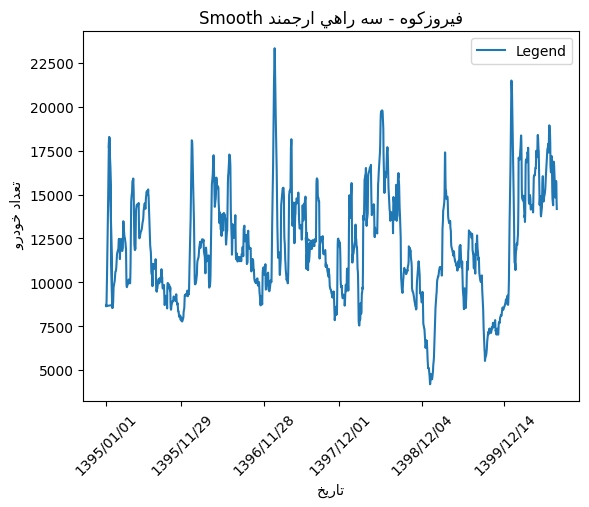

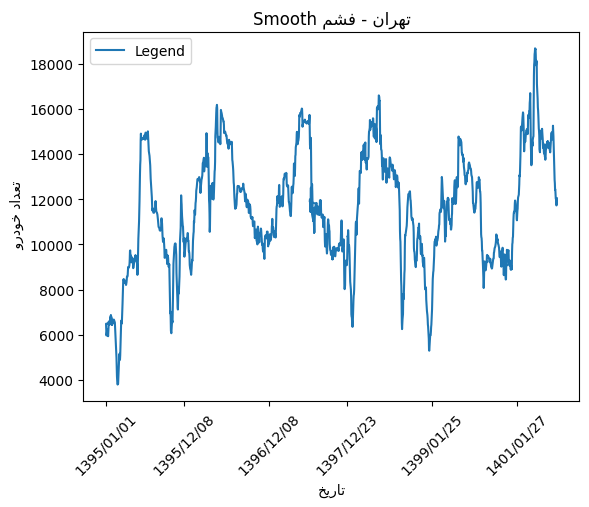

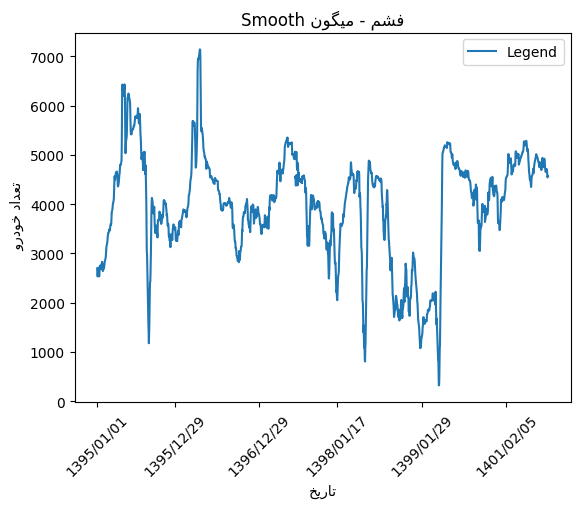

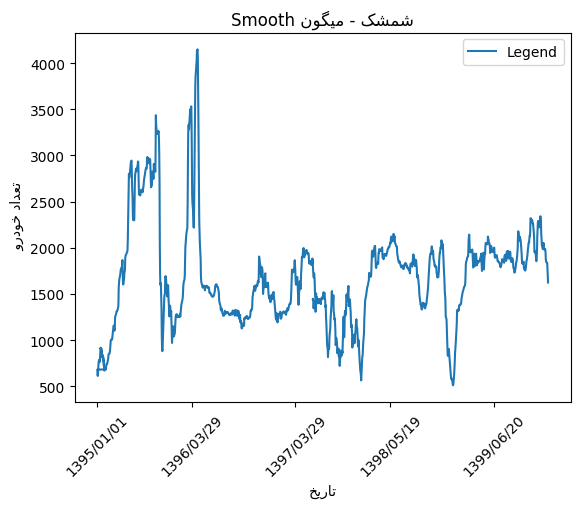

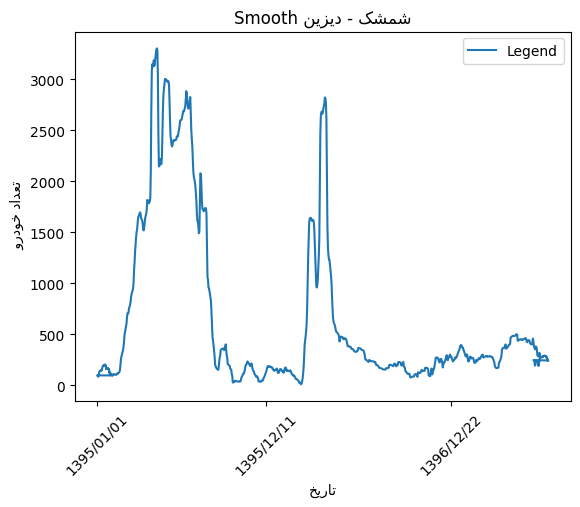

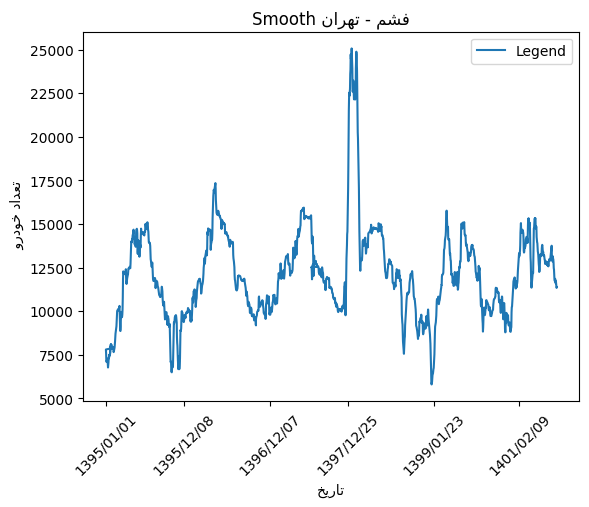

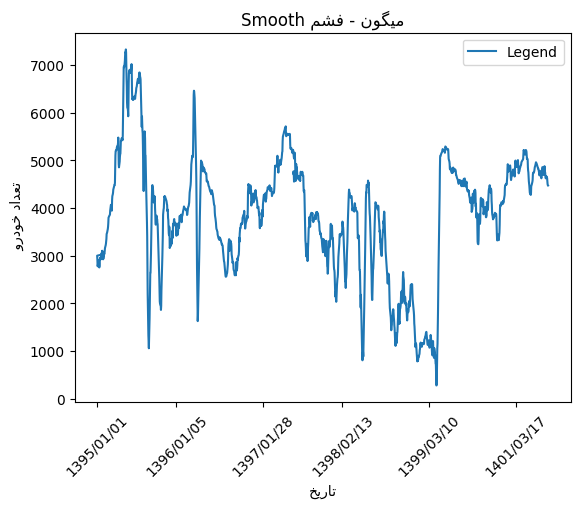

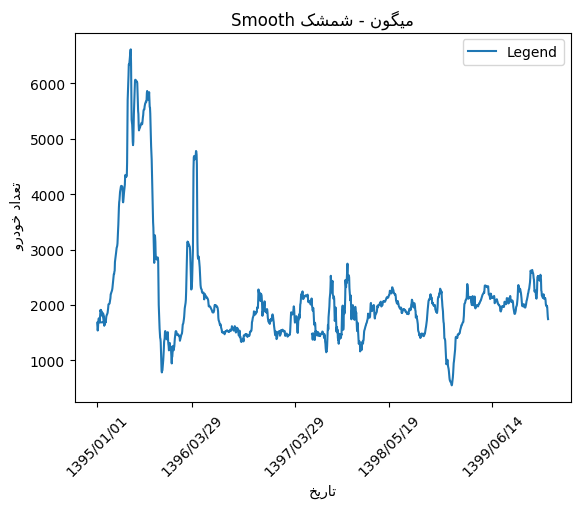

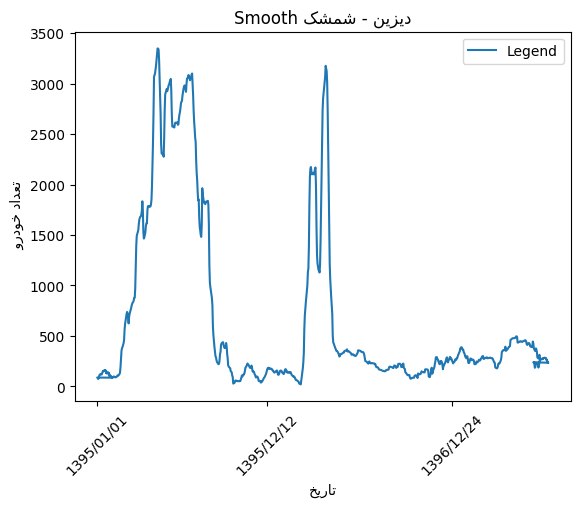

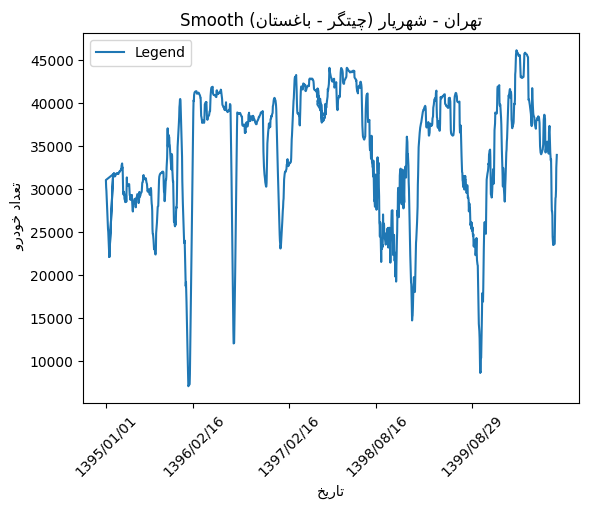

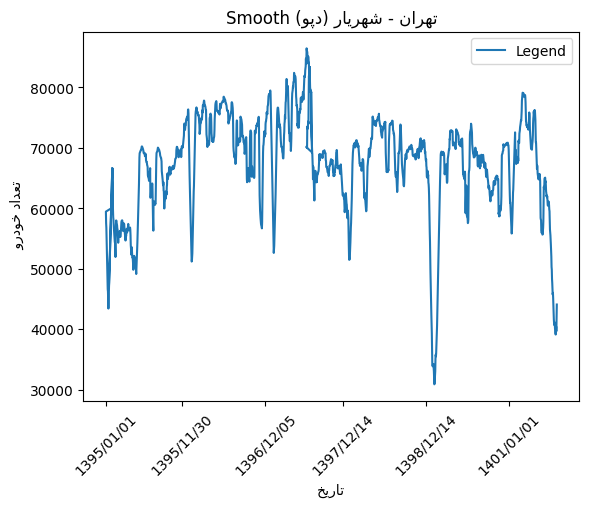

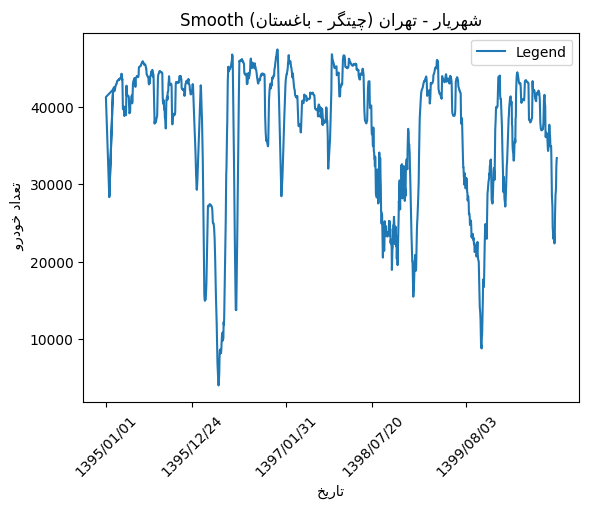

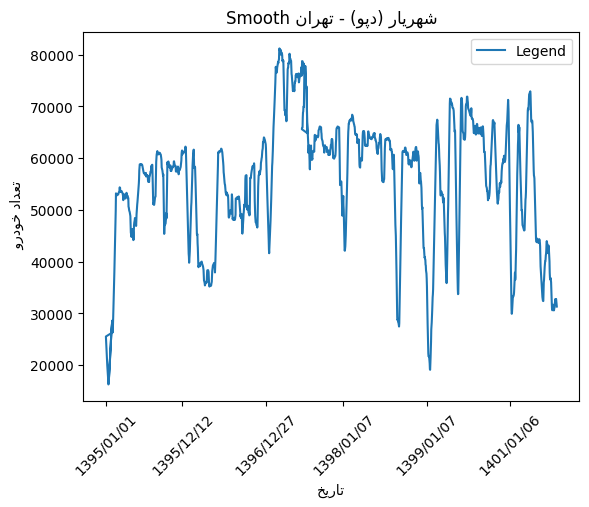

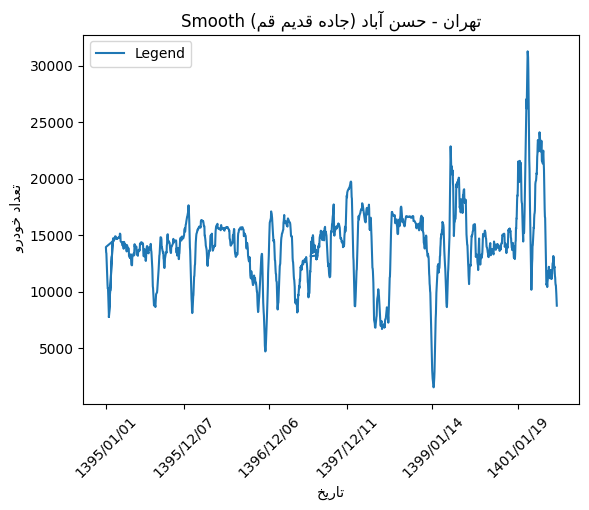

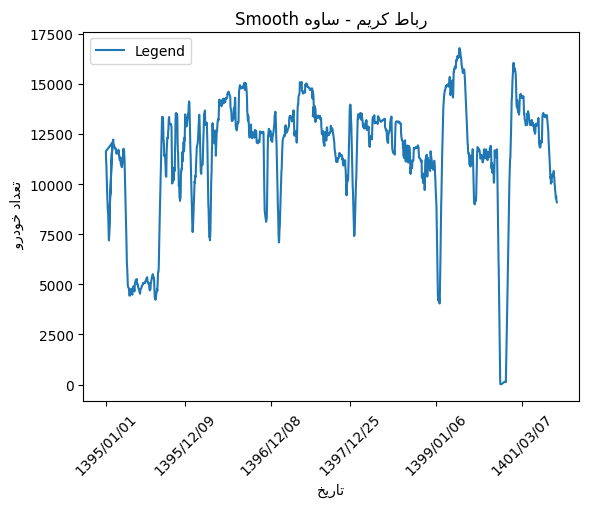

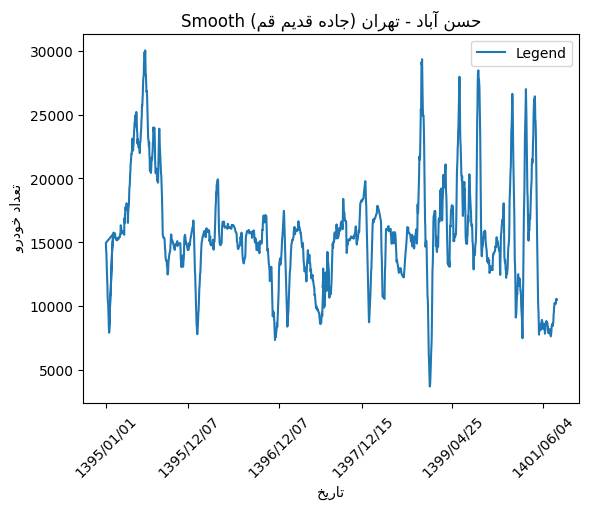

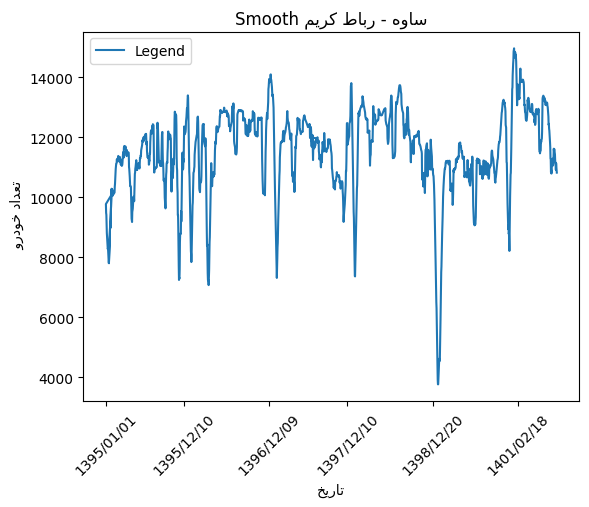

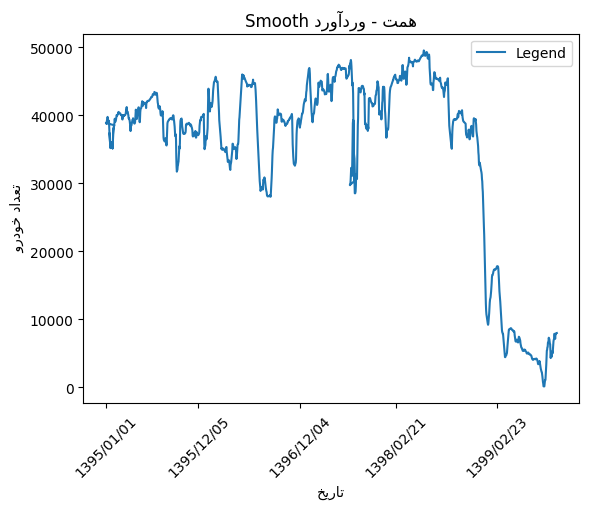

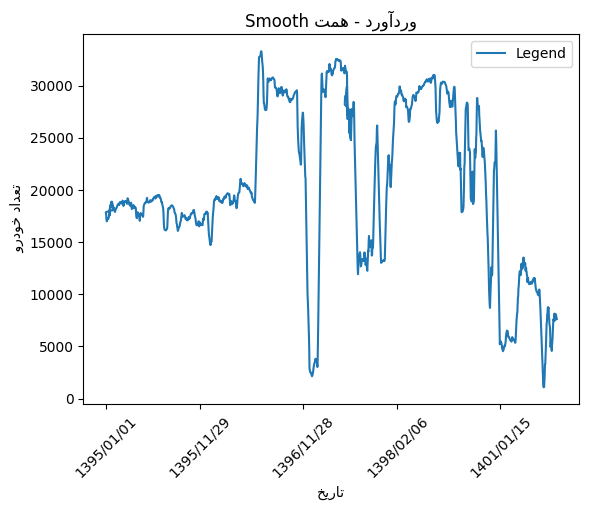

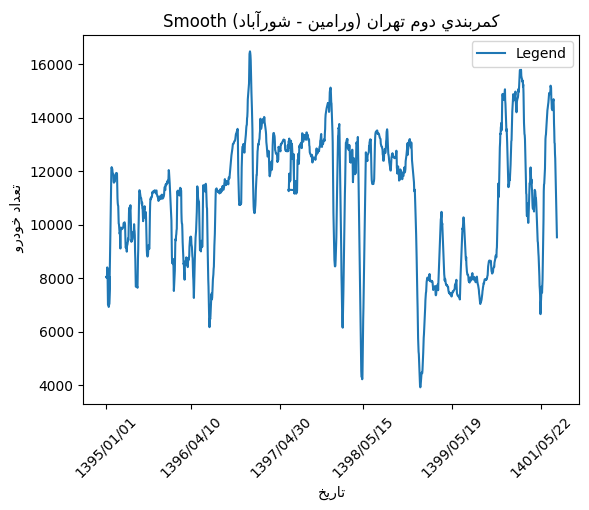

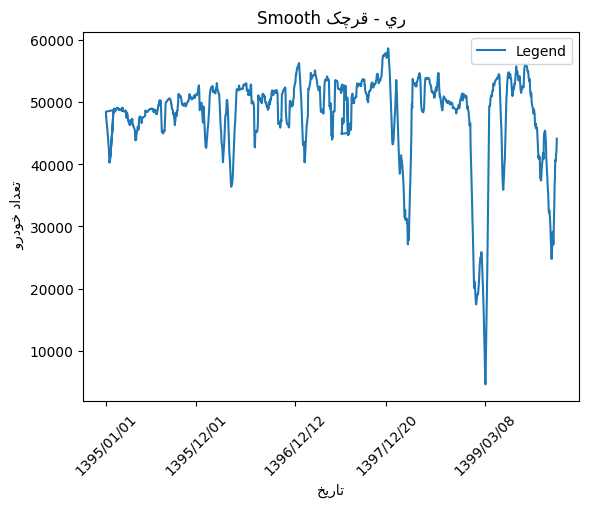

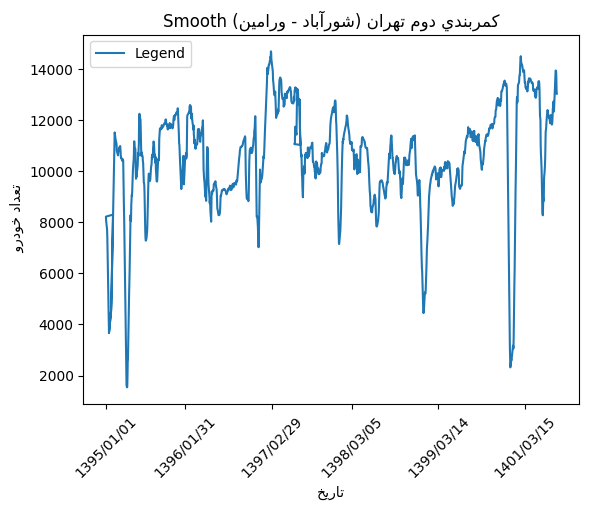

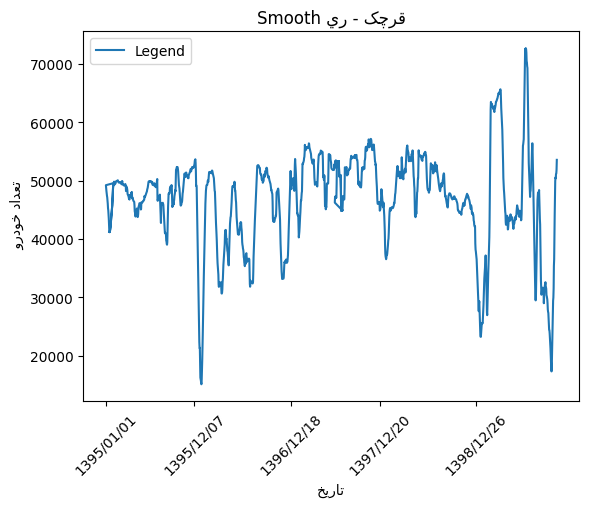

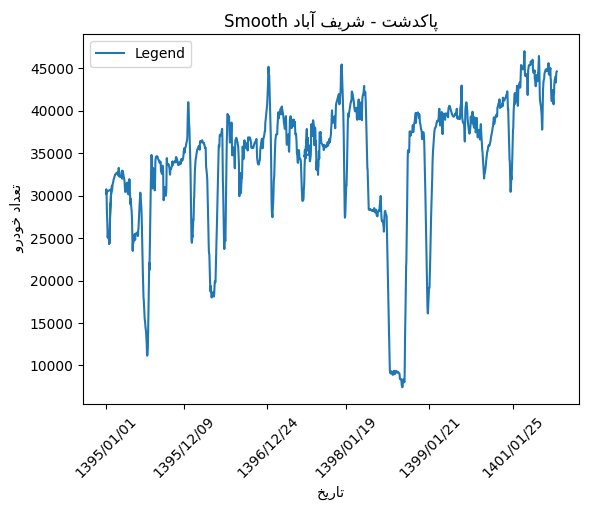

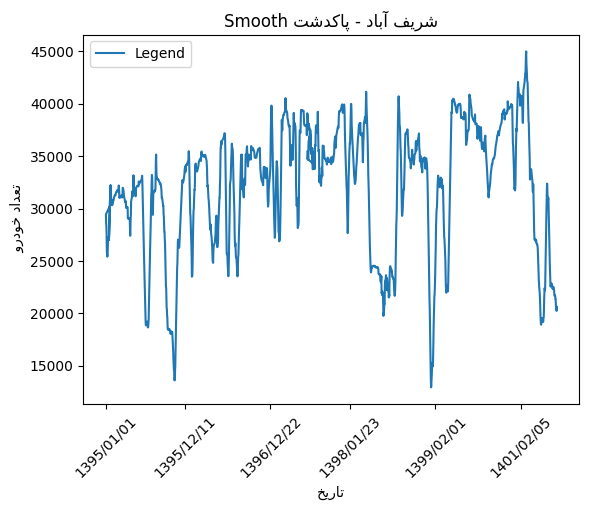

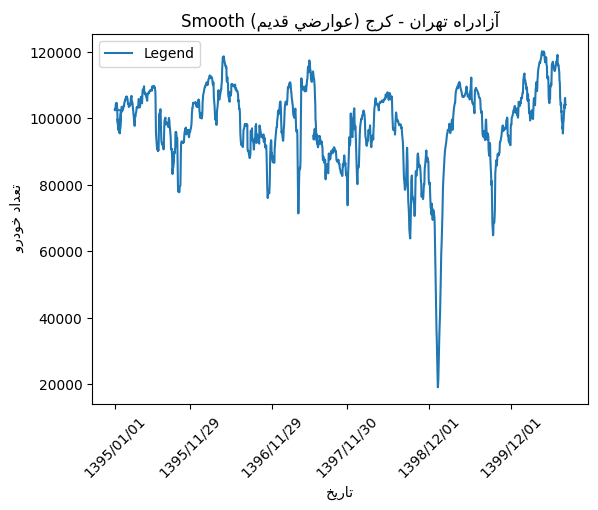

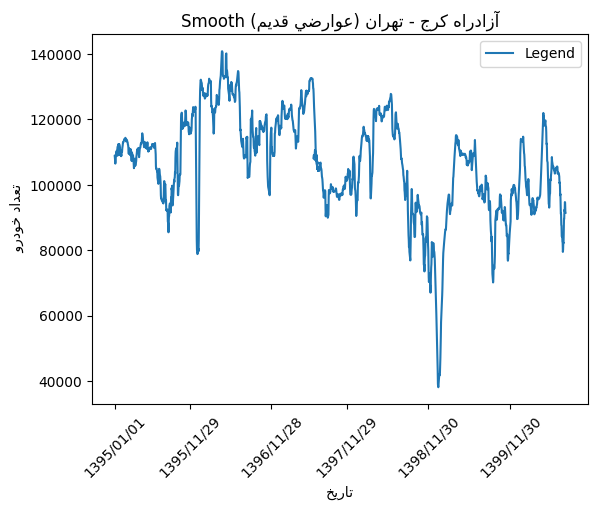

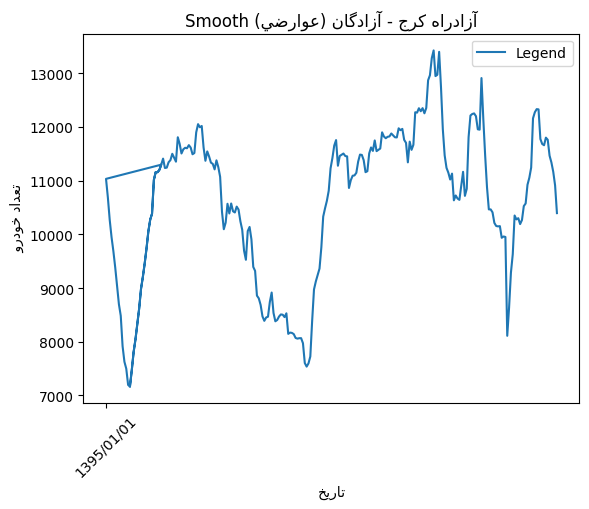

In [429]:
roads=test_roads

for code, df in roads.items():
    Draw_road_time_series_smooth(df, window=14)

# Cleaning Data:

In [ ]:
# Working with an example df
df = test_roads['113201']

# TODO smooth worked time


# df.loc[df['مدت زمان کارکرد(دقیقه)'] < 1440]
df.drop(columns='index', inplace=True)

df

کد محور                      نام محور            زمان شروع  \
0      113201           آزادراه قم - گرمسار  1395/01/01 00:00:00   
1      113201           آزادراه قم - گرمسار  1395/01/02 00:00:00   
2      113201           آزادراه قم - گرمسار  1395/01/03 00:00:00   
3      113201           آزادراه قم - گرمسار  1395/01/04 00:00:00   
4      113201           آزادراه قم - گرمسار  1395/01/05 00:00:00   
...       ...                           ...                  ...   
2023   113201  آزادراه قم - گرمسار (چرمشهر)  1401/07/13 00:00:00   
2024   113201  آزادراه قم - گرمسار (چرمشهر)  1401/07/27 13:15:00   
2025   113201  آزادراه قم - گرمسار (چرمشهر)  1401/07/28 00:00:00   
2026   113201  آزادراه قم - گرمسار (چرمشهر)  1401/07/29 00:00:00   
2027   113201  آزادراه قم - گرمسار (چرمشهر)  1401/07/30 00:00:00   

               زمان پایان  مدت زمان کارکرد(دقیقه)  تعداد کل وسیله نقلیه  \
0     1395/01/02 00:00:00                  1440.0                  5257   
1     1395/01/03 00:00:00                  1440.0                  5397   
2     1395/01/04 00:00:00                  1440.0                  4778   
3     1395/01/05 00:00:00                  1440.0                  4525   
4     1395/01/06 00:00:00                  1440.0                  4340   
...                   ...                     ...                   ...   
2023  1401/07/13 18:35:00                     NaN                  5975   
2024  1401/07/28 00:00:00                     NaN                  3232   
2025  1401/07/29 00:00:00                     NaN                  5300   
2026  1401/07/30 00:00:00                     NaN                  4543   
2027  1401/08/01 00:00:00                     NaN                  5021   

      تعداد وسیله نقلیه کلاس 1  تعداد وسیله نقلیه کلاس 2  \
0                         5138                        36   
1                         5255                        37   
2                         4572                        40   
3                         4379                        29   
4                         4188                        21   
...                        ...                       ...   
2023                      4502                       343   
2024                      1718                       406   
2025                      3003                       607   
2026                      2600                       432   
2027                      2668                       579   

      تعداد وسیله نقلیه کلاس 3  تعداد وسیله نقلیه کلاس 4  \
0                           30                        32   
1                           23                        55   
2                           24                        86   
3                           28                        50   
4                           26                        48   
...                        ...                       ...   
2023                       194                       311   
2024                       240                       265   
2025                       264                       488   
2026                       251                       429   
2027                       292                       487   

      تعداد وسیله نقلیه کلاس 5  سرعت متوسط  تعداد تخلف سرعت غیرمجاز  \
0                           21      100.42                    188.0   
1                           27      101.69                    237.0   
2                           56      100.63                    180.0   
3                           39      102.95                    271.0   
4                           57      102.67                    236.0   
...                        ...         ...                      ...   
2023                       625       98.00                      NaN   
2024                       603       88.00                      NaN   
2025                       938       88.00                      NaN   
2026                       831       89.00                      NaN   
2027                       995       86.00                      N

# find intersting road :
load and then sort the road by the linearRegression results.

In [29]:
def get_LinearReg_of_road_codes(codes):
    regression = dict()
    for i in  range(len(codes)):
        model = LinearRegression()
        df = getRoadChart(codes[i])

        y = df['تعداد کل وسیله نقلیه']
        x = np.reshape(df.index, (-1,1))
        model.fit(x, y)
        regression[codes[i]] = model
    return regression

roads_reg = get_LinearReg_of_road_codes(codes)


/tmp/ipykernel_5307/518673364.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(file_handler.load_csv_file(roads[i]))


In [473]:
# for (index,name ) in enumerate(names):
#     print(names[name] + " : " + str(roads_reg[name].coef_))



# create a regression df
regression_df = pd.DataFrame(columns = ['name', '6dc', 'coef', 'r^2'])

i = 0
em = []
reg_dict = {}
for _, code in enumerate(names):
    item = {
        'name': names[code],
        'code': code,
        'coef': roads_reg[code].coef_[0],
        'intercept': roads_reg[code].intercept_,
    }
    em.append(item)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


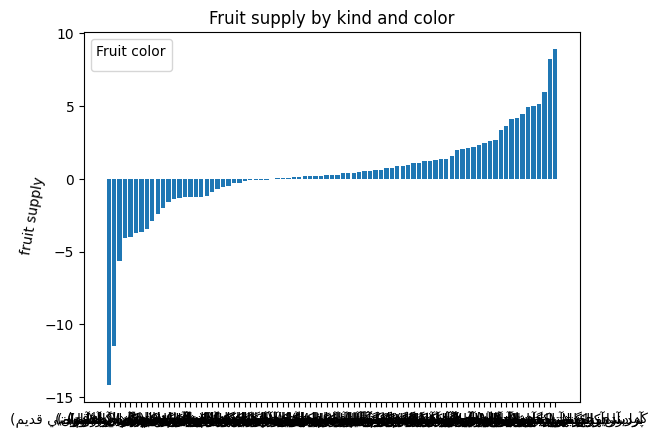

In [478]:
#Plot 

fig, ax = plt.subplots()
regression_df = regression_df.sort_values(by='coef')
road_names = regression_df['name'].apply(file_handler.persian_fix)
coefs = regression_df['coef']

ax.bar(road_names, coefs)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()
regression_df = (pd.DataFrame(em))



In [35]:
def sort_reg_form_High_to_low(regression):
    regression = {k: v for k, v in regression.items() if v != {}}
    sorted_models = sorted(regression.items(), key=lambda x: x[1].coef_[0])
    return sorted_models , regression

sorted_models , regression = sort_reg_form_High_to_low(roads_reg)
# for (name, coef) in sorted_models:
#     print(names[name], regression[name].coef_)

sorted_models[-1][1].coef_

array([8.91990877])

## check the extrime change in top roads
we sorted the road form most groth to least (negative) grouth , we only care about the extrem ones.

total road number
83


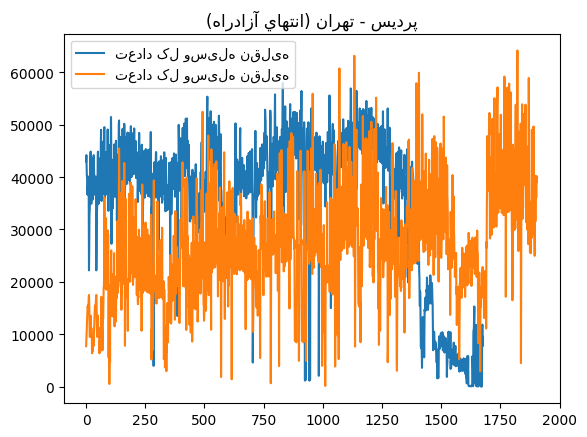

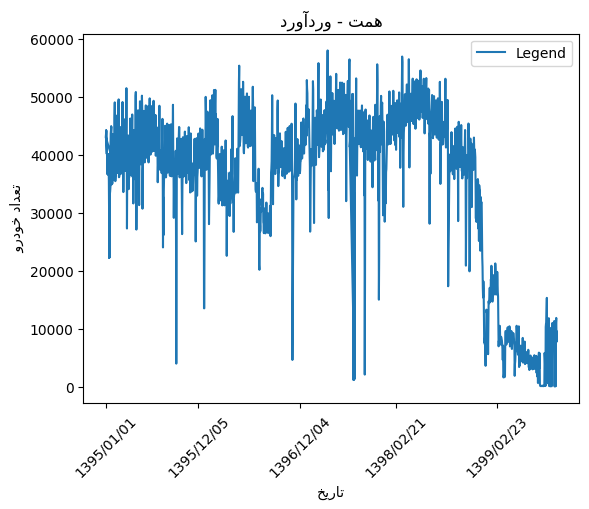

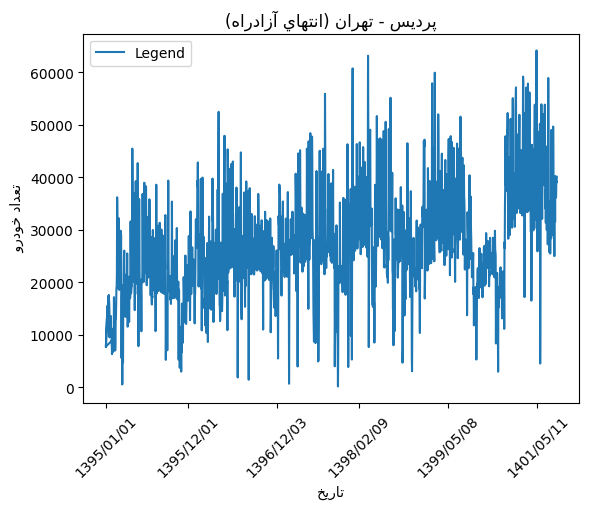

In [36]:
# Now lets plot some of these.
import file_handler
import importlib
importlib.reload(file_handler)

print("total road number")
print(len(sorted_models))

road_min = sorted_models[0]
road_max = sorted_models[-1]
df1=test_roads[road_min[0]]
df2=test_roads[road_max[0]]
ax = df1.iloc[:, [6]].plot(title=file_handler.persian_fix(names[road_min[0]]))
df2.iloc[:, [6]].plot(ax = ax, title=file_handler.persian_fix(names[road_max[0]]))


Draw_road_time_series(df1)
Draw_road_time_series(df2)

# show data on map :

## example for how to work with map :

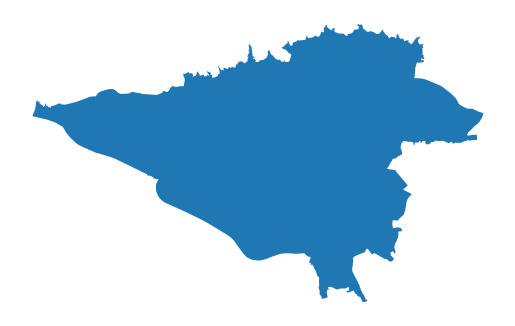

In [38]:
import osmnx as ox
city = ox.places = ox.geocode_to_gdf(['Tehran'])

ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

/tmp/ipykernel_5307/4214847888.py:1: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')


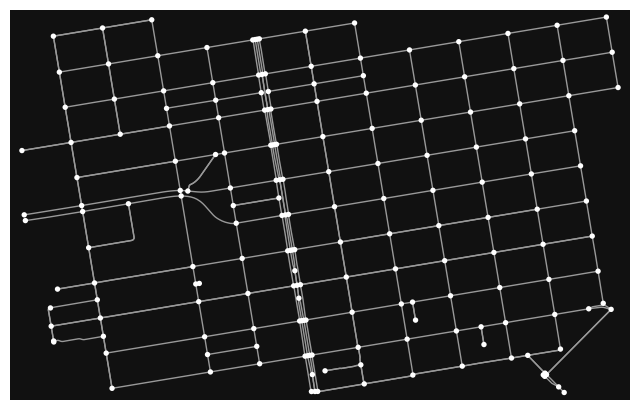

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [39]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

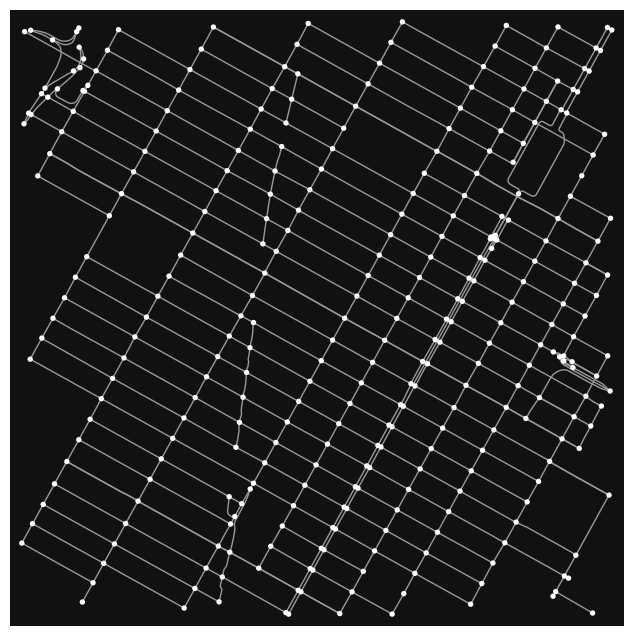

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [40]:
G = ox.graph_from_address('350 5th Ave, New York, New York', network_type='drive')
ox.plot_graph(G)

/tmp/ipykernel_5307/449147392.py:4: FutureWarning: The `get_undirected` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_undirected` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.get_undirected(G)


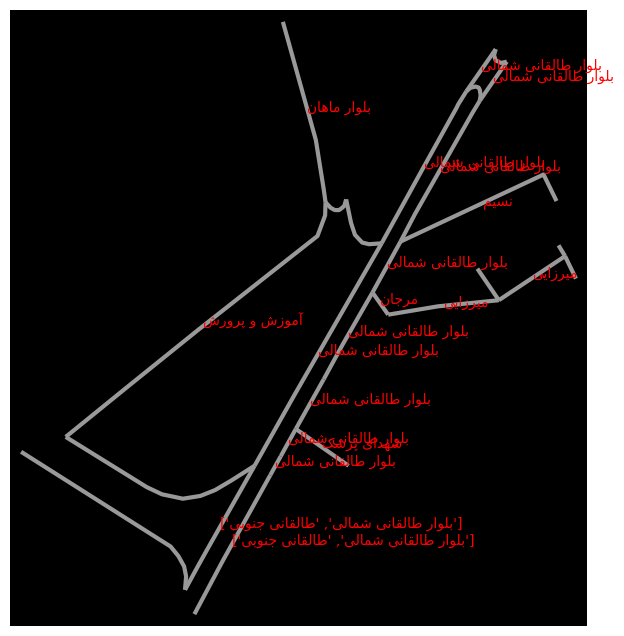

In [41]:
# G = ox.graph_from_place('کرج - آزادگان', network_type='drive', simplify=True)
# ox.plot_graph(G)
G = ox.graph_from_address('کرج', dist=200, network_type='drive')
G = ox.get_undirected(G)

fig, ax = ox.plot_graph(G, bgcolor='black', edge_linewidth=3, node_size=0,
                        show=False, close=False)
for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
    c = edge['geometry'].centroid
    text = edge['name']
    ax.title.set_color('red')

    ax.annotate(file_handler.persian_fix(text), (c.x, c.y), c='red')
plt.show()

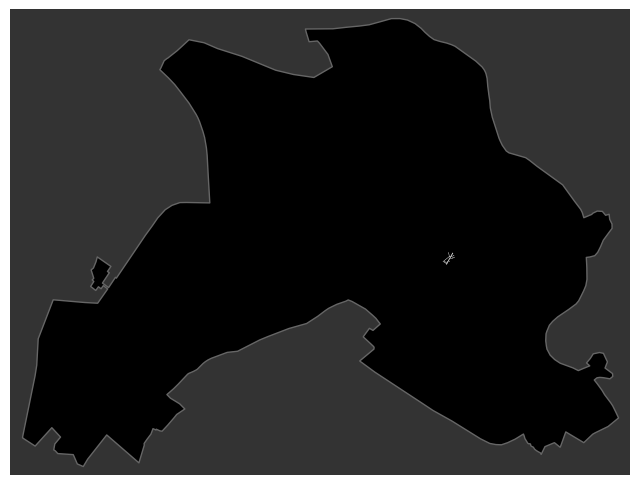

In [42]:
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    edge_color="w",
    edge_linewidth=0.3,
    node_size=0,
)
gdf = ox.geocode_to_gdf("کرج")

# to this matplotlib axis, add the place shape(s)
gdf.plot(ax=ax, fc="k", ec="#666666", lw=1, alpha=1, zorder=-1)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

## map of our data

In [62]:
def load_the_map_of_city(place,custom_filter,bbox):
    G = ox.graph_from_bbox(bbox=(36.1290,35.1525,52.4501,50.2940), retain_all=True, simplify = True, network_type='all', custom_filter=cf)
    # Prepare data
    u = []
    v = []
    key = []
    data = []
    for uu, vv, kkey, ddata in G.edges(keys=True, data=True): # added ww
        u.append(uu)
        v.append(vv)
        key.append(kkey)
        data.append(ddata)
    return G,data

def find_road_in_map_by_code(data,code):
    for item in data:
        if item.get('osmid') == code:
            print(item)

In [112]:
place = ["Tehran, Iran"]
cf = '["highway"~"trunk|motorway|primary"]'
bbox=(36.0290,35.0525,52.3501,50.1940)

G, data = load_the_map_of_city(place,cf,bbox)
find_road_in_map_by_code(data,4480201)

{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 19.377}
{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 539.103, 'geometry': <LINESTRING (51.367 35.561, 51.368 35.564, 51.369 35.564, 51.369 35.566)>}
{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 17.774}


### code of importent road

In [371]:
osmid_codes = {
    449543314: 114552,
    4480201:113203,
    455662779:113201,
    310645428:113203,
    682250684:113204,
    690717083:113205,
    179112188:113206,
    179112339:113207,
    39084751:113209,
    474570267:113210,
    732964465:113211,
    1164700378:113212,
    36866563:113213,
    614530723:113214,
    197825489:113228,
    455662482:113251,
    285327032:113253,
    381904561:113254,
    4434033:113255,
    575076025:113256,
    480643667:113257,
    39084751:113259,
    474606388:113260,
    709553124:113261,
    488449902:113262,
    36866563:113263,
    368438120:113264,
    35703240:113278,
    28759193:113302,
    789349374:113352,
    737634684:113401,
    4906731:113403,
    4906887:113404,
    # 425354039:
    667922913:113413,
    184492590:113414,
    1148442659:113415,
    510202216:113416,
    1046123165:113417,
    1037876565:113418,
    739570288:113419,
    663254975:113474,
    408320454:113501,
    222990063:113552,
    39017520:113801,
    368453187:113802,
    84344124:113853,
    410366481:113804,
    609759412:113904,
    251846902:113903,
    755383671:114101,
    663501002:114102,
    465671667:114301,
    666120704:114352,
    514896361:114401,
    406648524:114451,
    1163351152:114551,
    # 466291376:
}

osmid_names = {
    'بزرگراه آزادگان': 114552,
    'آزادراه خلیج فارس':113203,
    113201:'آزاد راه قم ـ گرمسار',
    113205:'تهران-قم (خلیج فارس)',
    113204:'تهران - ساوه (ابتداي آزادراه)‬',
    113205:'تهران - جاجرود‬',
    113206:'تهران-پردیس(ابتدا)',
    113207:'تهران-پردیس(انتها)',
    113209:'تهران - پاکدشت',
    113210:'عوارضی تهران-قم',
    113211:'چرمشهر-حسن آباد',
    113212:'امامزاده داوود-تهران',
    113213:'تهران-لواسان(طلاییه)',
    113214:'تهران-لواسان(سوهانک)',
    113228:'تهران-ساوه(پرند)',
    113251:'گرمسار-قم',
    113253:'قم-تهران',
    113254:'ساوه-تهران(ابتدا)',
    113255:'جاجرود-تهران',
    113256:'پردیس-تهران(ابتدا)',
    113257:'پردیس-تهران(انتها)',
    113259:'پاکدشت-تهران',
    113260:'قم-تهران عوارضی',
    113261:'حسن آباد-چرمشهر',
    113262:'تهران - امام زاده داوود‬',
    113263:'لواسان-تهران(طلاییه)',
    113264:'لواسان-تهران(سوهانک)‬',
    113278:'‫آزادراه ساوه - تهران(پرند)‬',
    113302:'اسلامشهر-واوان',
    113352:'‫واوان-اسلامشهر‬',
    113401:'آبسرد-ایوانکی',
    113403:'رودهن-دماوند',
    113404:'دماوند-فیروزکوه',
    113413:'سه راهي مشاء - امامزاده هاشم‬',
    113414:'کمربندي جنوبي رودهن (انتهاي پرديس - دماوند)‬',
    113415:'فیروزکوه-سمنان',
    113416:'آبسرد-گیلاوند',
    113417:'آبسرد-سربندان',
    113418:'سربندان-امین آباد',
    113419:'دماوند-گیلاوند',
    113474:'آبعلی-رودهن',
    113501:'فیروزکوه-گدوک',
    113552:'فیروزکوه-سه راهی ارجمند',
    113801:'تهران-فشم',
    113802:'فشم-میگون',
    113853:'میگون-شمشک',
    113804:'شمشک-دیزین',
    113904:'تهران - شهريار (دپو)‬',
    113903:'تهران - شهريار (چيتگر - باغستان)‬',
    114101:'تهران - حسن آباد (جاده قديم قم)‬',
    114102:'رباط کریم-ساوه',
    114301:'کمربندی دوم تهران(ورامین-شورآباد)',
    114352:'قرچک-ری',
    114401:'پاکدشت-شریف آباد',
    114451:'شريف آباد - پاکدشت‬ ',
    114551:'آزادراه کرج - تهران (عوارضي قديم)‬',
}



osmid_names_new = {}
data_df = pd.DataFrame(data)
# data_df[type(data_df['osmid']) == list]
data_df.info()
data_df['flatted'] = [(str(item) if type(item) == int \
    else ' '.join(map(lambda x: str(x),np.array(item).reshape(-1,1).ravel()))) for item in data_df['osmid']]
# data_df
osmid_codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13457 entries, 0 to 13456
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   osmid     13457 non-null  object 
 1   oneway    13457 non-null  bool   
 2   ref       4917 non-null   object 
 3   name      8555 non-null   object 
 4   highway   13457 non-null  object 
 5   maxspeed  8094 non-null   object 
 6   reversed  13457 non-null  object 
 7   length    13457 non-null  float64
 8   geometry  11307 non-null  object 
 9   lanes     4690 non-null   object 
 10  bridge    1106 non-null   object 
 11  tunnel    180 non-null    object 
 12  junction  629 non-null    object 
 13  access    30 non-null     object 
 14  width     2 non-null      object 
dtypes: bool(1), float64(1), object(13)
memory usage: 1.5+ MB


{449543314: 114552,
 4480201: 113203,
 455662779: 113201,
 310645428: 113203,
 682250684: 113204,
 690717083: 113205,
 179112188: 113206,
 179112339: 113207,
 39084751: 113259,
 474570267: 113210,
 732964465: 113211,
 1164700378: 113212,
 36866563: 113263,
 614530723: 113214,
 197825489: 113228,
 455662482: 113251,
 285327032: 113253,
 381904561: 113254,
 4434033: 113255,
 575076025: 113256,
 480643667: 113257,
 474606388: 113260,
 709553124: 113261,
 488449902: 113262,
 368438120: 113264,
 35703240: 113278,
 28759193: 113302,
 789349374: 113352,
 737634684: 113401,
 4906731: 113403,
 4906887: 113404,
 667922913: 113413,
 184492590: 113414,
 1148442659: 113415,
 510202216: 113416,
 1046123165: 113417,
 1037876565: 113418,
 739570288: 113419,
 663254975: 113474,
 408320454: 113501,
 222990063: 113552,
 39017520: 113801,
 368453187: 113802,
 84344124: 113853,
 410366481: 113804,
 609759412: 113904,
 251846902: 113903,
 755383671: 114101,
 663501002: 114102,
 465671667: 114301,
 666120704

In [405]:
# Using flatted approach
for item in data:
    if type(item['osmid']) == int and item['osmid'] in osmid_codes:
        osmid_names_new[item['name']] = osmid_codes[item['osmid']]
    if type(item['osmid']) == list:
        for _id in item['osmid']:
            if _id in osmid_codes:
                name = item['name']
                # Check if it has a list of names
                if type(name) == list:
                    name = sorted(name)[
                        0]  # FIXME handle all names not just first one.\
                osmid_names_new[name] = osmid_codes[_id]
                break

no_name_osmid = []
no_names = list(set(osmid_names.keys())-set(osmid_names_new.keys()))
for i in no_names:
    val = [key for key, val in osmid_codes.items() if val == i]
    if len(val) > 0:
        no_name_osmid.append(str(val[0]))
        # print(val[0])
    # print(i, names[str(i)]  )


# for code in no_name_osmid:
#     for row in data_df:
#         print( row[['flatted']])
for code in no_name_osmid:
    name = data_df[data_df['flatted'].str.contains(code)]
    names = []
    values = []

    values = name['osmid'].values

    if len(values) > 0:
        values = np.hstack(values)

    sd_code = 0
    for v in values:
        if v in osmid_codes:
            sd_code = int(osmid_codes[v])
            break;

    print(sd_code, values)
    name = name.values

    for v in values:
        osmid_codes[v] = sd_code


113413 [667922913]
113414 [1027314052  184492584  184492590  694282969  184492565  184492566
  184492569  184492573  184492574]
0 []
113416 [510202216 510202216 510202216 510202216 510202216 510202216 510202216
 510202216]
113801 [469533444 469533445  39017520 368453174  39017399]
113802 [368453187 368453187]
113417 [ 317954264  100607099 1046123165  317954263]
0 []
113418 [ 203491152  203491147 1037876565 1037876565]
0 []
0 []
114451 [406648524 406648526 509420007]
113302 [28759193 28759193 28759193 28759193 28759193 28759193]
114352 [666120696 666120697 666120704 666120706]
0 []
113204 [ 28759002  28759003 682250684 682250684 682250684 682250684 682250684
 682250684 682250684 682250684 574958849 682250684]
0 []
113206 [179112202 179112269 480643666 179112404 440183349 212244791 179112187
 179112188]
113207 [179112320  70083713 179112290 179112354 179112293 179112326 179112200
 179112233 179112272 179112339 179112182 179112313 179112346 179112187
 179112227 179112339 663652633]
114101

In [381]:
osmid_names = osmid_names |osmid_names_new
osmid_codes

{449543314: 114552,
 4480201: 113203,
 455662779: 113201,
 310645428: 113203,
 682250684: 113204,
 690717083: 113205,
 179112188: 113206,
 179112339: 113207,
 39084751: 113259,
 474570267: 113210,
 732964465: 113211,
 1164700378: 113212,
 36866563: 113263,
 614530723: 113214,
 197825489: 113228,
 455662482: 113251,
 285327032: 113253,
 381904561: 113254,
 4434033: 113255,
 575076025: 113256,
 480643667: 113257,
 474606388: 113260,
 709553124: 113261,
 488449902: 113262,
 368438120: 113264,
 35703240: 113278,
 28759193: 113302,
 789349374: 113352,
 737634684: 113401,
 4906731: 113403,
 4906887: 113404,
 667922913: 113413,
 184492590: 113414,
 1148442659: 113415,
 510202216: 113416,
 1046123165: 113417,
 1037876565: 113418,
 739570288: 113419,
 663254975: 113474,
 408320454: 113501,
 222990063: 113552,
 39017520: 113801,
 368453187: 113802,
 84344124: 113853,
 410366481: 113804,
 609759412: 113904,
 251846902: 113903,
 755383671: 114101,
 663501002: 114102,
 465671667: 114301,
 666120704

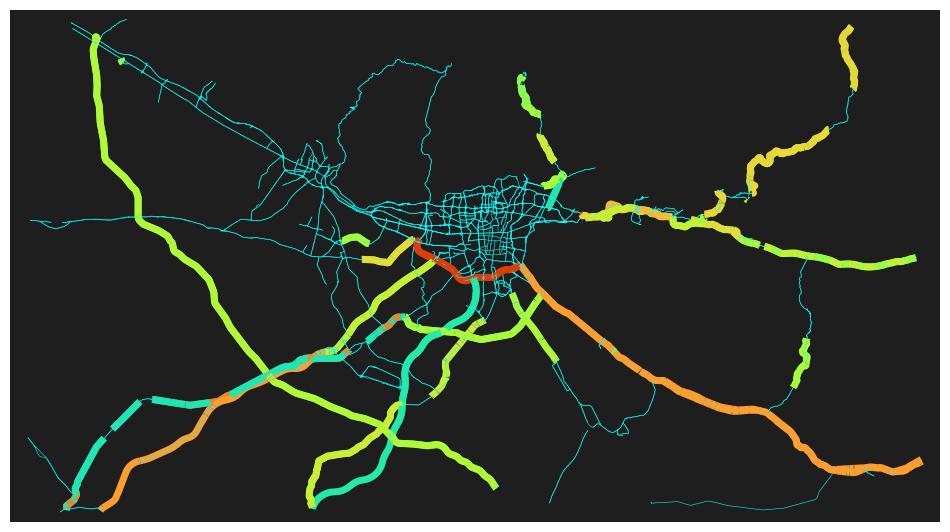

ساوه - تهران
 
آزادراه تهران - ساوه
آزادراه شهید قاسم سلیمانی
اتوبان ساوه - تهران
بلوار لمام خمینی
جاده قدیم تهران - قم
تهران - ساوه
کمربندی دوم تهران
بزرگراه آزادگان
آزادراه خلیج فارس
بزرگراه باغستان
آزاد راه تهران - ساوه
آزادراه غدیر
میگون - فشم
اوشان - فشم
بزرگراه امام رضا
شهید سیدعلی روته
جاده دماوند
آزادراه شهید سپهبد سلیمانی
جاده فیروزکوه
جاده لشکرک
بزرگراه ورامین - تهران
جاده آبسرد
فیروزکوه - تهران
بلوار آیت الله خامنه ای
جاده هراز
تهران - فیروزکوه
جاده مشاء
جاده آبسرد ایوانکی


/tmp/ipykernel_5307/3654470541.py:106: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.tight_layout(pad=0)
/tmp/ipykernel_5307/3654470541.py:107: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.savefig("heatmap.jpg", dpi=600, bbox_inches='tight', format="png",


In [400]:
def map_drawer(data):
    roadCols = []
    edge_width = []
    # cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["red","orange", "green"])
    cmap = mpl.colormaps['turbo'].resampled(80)
    for item in data:
        mark = False
        if(item['osmid'] == '667922913'):
            print('salam')
        if "osmid" in item.keys():
            # Check by code
            if type(item['osmid']) == list:
                # if a road has multiple osmid's see if any of them intersects.
                if len(set(item['osmid']).intersection(set(osmid_codes.keys()))) > 0:
                    edge = 5
                    mark = True
                    code = list(set(item['osmid']).intersection(
                        set(osmid_codes.keys())))[0]
            else:
                if item["osmid"] in list(osmid_codes.keys()):
                    edge = 5
                    code = item['osmid']
                    mark = True
        if mark:
            # get 6digit code
            _6d = str(osmid_codes[code])
            val = (regression[_6d].coef_)
            min = -12
            max = +12

            # normalize color
            val = (val - min)/(max - min)

            # check by names
        if ('name' in item.keys()):
            if type(item['name']) == str:
                if item["name"] in osmid_names.keys():
                    color = "#FFFFF0"
                    edge = 5
                    # els

                    mark = True
                    _6d = str(osmid_names[item['name']])
                    val = (regression[_6d].coef_)
                    min = -12
                    max = +12

                    # normalize color
                    val = (val - min)/(max - min)
        if mark:
            color = (mpl.colors.rgb2hex(cmap(val), keep_alpha=True))

        if not mark:
            color = "#00FFFF"
            edge = 0.4

        roadCols.append(color)
        edge_width.append(edge)

    # Plot
    bgcolor = "#1e1e1e"
    fig, ax = ox.plot_graph(G, node_size=0,
                            dpi=500, bgcolor=bgcolor,
                            save=False, edge_color=roadCols,
                            edge_linewidth=edge_width, edge_alpha=1, figsize=(12, 12))

    # fig, ax = ox.plot_graph(G, bgcolor='black', edge_linewidth=3, node_size=0,
    #                         show=False, close=False)
    global labels
    labels = []
    for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
        osmid_arr = np.array(edge['osmid']).tolist()
        good = False
        name = ''

        if type(osmid_arr) == int:
            if osmid_arr in osmid_codes:
                name = edge['name']
                good = True
        elif type(osmid_arr) == list:
            for c in osmid_arr:
                if c in osmid_codes:
                    good = True
                    break
            if good:
                name = sorted(edge['name'])[0]

        if good:
            c = edge['geometry'].centroid

            ax.title.set_size(14)
            if name in labels:
                continue

            print(name)

            labels.append(name)
            e1 = edge

            ax.annotate(file_handler.persian_fix(name),
                        (c.x, c.y), c='blue', size=4)


    # fig.show()

    fig.tight_layout(pad=0)
    fig.savefig("heatmap.jpg", dpi=600, bbox_inches='tight', format="png",
                facecolor=fig.get_facecolor(), transparent=False)
    fig
map_drawer(data)

In [396]:
labels

['ساوه - تهران',
 'آزادراه تهران - ساوه',
 'آزادراه شهید قاسم سلیمانی',
 'اتوبان ساوه - تهران',
 'بلوار لمام خمینی',
 'جاده قدیم تهران - قم',
 'تهران - ساوه',
 ' ',
 'کمربندی دوم تهران',
 'آزادراه شهید قاسم سلیمانی',
 ' ',
 'بزرگراه آزادگان',
 'بزرگراه آزادگان',
 ' ',
 ' ',
 'آزادراه خلیج فارس',
 'بزرگراه باغستان',
 'آزاد راه تهران - ساوه',
 'آزاد راه تهران - ساوه',
 'تهران - ساوه',
 ' ',
 'آزادراه غدیر',
 'میگون - فشم',
 ' ',
 ' ',
 ' ',
 'اوشان - فشم',
 'بزرگراه امام رضا',
 'شهید سیدعلی روته',
 'جاده دماوند',
 ' ',
 ' ',
 'آزادراه شهید سپهبد سلیمانی',
 'آزادراه شهید سپهبد سلیمانی',
 'آزادراه شهید سپهبد سلیمانی',
 'آزادراه شهید سپهبد سلیمانی',
 'جاده فیروزکوه',
 'جاده لشکرک',
 ' ',
 'آزادراه شهید سپهبد سلیمانی',
 'بزرگراه امام رضا',
 ' ',
 'بزرگراه ورامین - تهران',
 'آزادراه شهید سپهبد سلیمانی',
 'بزرگراه امام رضا',
 'جاده آبسرد',
 'فیروزکوه - تهران',
 'بلوار آیت الله خامنه ای',
 'جاده هراز',
 ' ',
 'تهران - فیروزکوه',
 'جاده مشاء',
 'جاده آبسرد ایوانکی']